Katie Chase

### Discerning a Novel Auditory-Motor Map: How Well Do Participants Reproduce Target Sounds?

## Background

   background


### Figure 1: The Novel Auditory-Motor Map in the Experiment
<br>

![Table 1:](auditory-motor-mapping-refined.png)

### Variables of Interest


**Demographic Measures:**
- Gender: As reported by participants (male, female, genderqueer/non-binary)
- Age: As reported by participants (in years, between 18-99)
- Race: As reported by participants (American Indian or Alaskan Native, Asian, Black or African American, Native Hawaiian or Other Pacific Islander, White or Caucasian, More than one race, Unknown)
- Ethnicity: As reported by participants (Hispanic or Latino, Not Hispanic or Latino)
- Handedness: As reported by participants (Ambidextrous, Left, Right)
- Music Instrument: Whether they play an instrument as reported by participants (Yes, No)
- Music Practice: As reported by participants (number of hours per week, between 0-168)
- Musical Training: As reported by participants (0-1 year, 1-5 years, 5-10 years, 10+ years)
- Languages: # of languages spoken as reported by participants (1, 2, 3+)


Performance Data

- Target Angle: Pre-planned target positions in degrees (45°, 135°, 225°, 315°) that participants need to reach toward
- Reaction Time: Time elapsed from when target appears until participant begins moving (measured in milliseconds, includes the time the target sound plays in the testing phase)
- Movement Time: Time elapsed from when participant begins moving until they reach the target (measured in milliseconds)
- Hand Angle: Angle in degrees of the participant's hand movement at completion of trajectory/path
- Hand Path: Array of cursor position coordinates {time, x, y} collected during each reaching movement to track precise trajectory of movement



### Hypothesis

1 - We hypothesize that participants will be able to learn the novel auditory-motor map and reproduce target sounds in the testing phase with increasing refinement of execution of the task in successive trials. 

2 - We hypothesize that more music experience, training or practice hours or more languages spoken will positively affect performance. 


### Data Plan Organization

 1. Data Cleansing:
    - Data Auditing
       - Delete Irrelevant Data
       - Calculate Angle Error from Intended Target

 2. Description of Data Architecture
      - Result of Tidy-compliant data
      - Explaination

 3. Statistical Analyses (Step by step) including: 
       - Overall accuracy
       - Chi Square Test to compare Performance By Quadrant
       - Compare Types of Error (Mismatch of Formant, Frequency, or Both)
       - Correlation Matrices 
       - Principal Component Analyses 
       - Generalized Linear Model
       - Cross-Validation Analysis
       - Bootstrapping
       - Bayes Factor Analysis
 


### 1. Data Cleansing

#### Remove Columns with Info Beyond Current Analysis

Make new csv file from original data file and keep data that is relevant to my question
    - Delete Columns: 
        Comments, Distractions, Distracto, Mouse Type, Returner, Target File, Interrupted, Experiment Name, Start Time, Cursor FB, Rotation, Search Time, Reach FB, Start_X, Start_Y, Screen_Height, Screen_Width, Group

In [290]:
# Clean Demographics and Performance Data

# Load necessary libraries
library(dplyr)    # For data manipulation
library(readr)    # For reading and writing CSV files

# Define the input and output file paths
input_file <- "combined_demographics_performance_revised.csv"
output_file <- "demographics_performance_cleaned.csv"

# Read the CSV file
data <- read_csv(input_file)

# Display information about the original dataframe
cat("Original dataframe dimensions:", dim(data)[1], "rows by", dim(data)[2], "columns\n")

# List of columns to drop
columns_to_drop <- c(
  "Comments", "Distractions", "Distracto", "Mouse Type", "Returner", 
  "Target File", "Interrupted", "Experiment Name", "Start Time", 
  "Cursor FB", "Rotation", "Search Time", "Reach FB", "Start_X", 
  "Start_Y", "Screen_Height", "Screen_Width", "Group", "Ethnicity", "Race", "Sex"
)

# Drop the specified columns using dplyr
data_cleaned <- data %>% select(-all_of(columns_to_drop))

# Display information about the cleaned dataframe
cat("Cleaned dataframe dimensions:", dim(data_cleaned)[1], "rows by", dim(data_cleaned)[2], "columns\n")

# Check which columns remain
cat("Remaining columns:\n")
print(colnames(data_cleaned))

# Verify that all specified columns were removed
remaining_specified <- columns_to_drop[columns_to_drop %in% colnames(data_cleaned)]
if (length(remaining_specified) > 0) {
  cat("Warning: The following columns were not removed:", paste(remaining_specified, collapse = ", "), "\n")
} else {
  cat("All specified columns were successfully removed.\n")
}

# Save the cleaned dataframe to a new CSV file
write_csv(data_cleaned, output_file)
cat("Cleaned data saved to", output_file, "\n")

# Verify the file was created
if (file.exists(output_file)) {
  file_info <- file.info(output_file)
  cat("File size:", format(file_info$size / 1024, digits = 2), "KB\n")
  
  # Read the file back to verify
  data_verification <- read_csv(output_file)
  cat("Verification - Shape of saved file:", dim(data_verification)[1], "rows by", dim(data_verification)[2], "columns\n")
}

head(output_file)
head(data_cleaned)

Rows: 2800 Columns: 34
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (20): Comments, Distractions, Distracto, Handedness, Ethnicity, language...
dbl (14): Subject_ID, Age, musicPractice, Trial Number, Target Angle, Rotati...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Original dataframe dimensions: 2800 rows by 34 columns
Cleaned dataframe dimensions: 2800 rows by 13 columns
Remaining columns:
 [1] "Subject_ID"      "Age"             "Handedness"      "languageCount"  
 [5] "musicInstrument" "musicPractice"   "musicTraining"   "Trial Number"   
 [9] "Target Angle"    "Hand Angle"      "RT"              "MT"             
[13] "Hand_Path"      
All specified columns were successfully removed.
Cleaned data saved to demographics_performance_cleaned.csv 
File size: 1414 KB


Rows: 2800 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (5): Handedness, languageCount, musicInstrument, musicTraining, Hand_Path
dbl (8): Subject_ID, Age, musicPractice, Trial Number, Target Angle, Hand An...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Verification - Shape of saved file: 2800 rows by 13 columns


[1] "demographics_performance_cleaned.csv"

Subject_ID,Age,Handedness,languageCount,musicInstrument,musicPractice,musicTraining,Trial Number,Target Angle,Hand Angle,RT,MT,Hand_Path
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
164800,19,righth,3+,yes,0,"""0-1""",1,45,46.27303,1663,1982,"{""sample_4_y"": 272, ""sample_2_time"": 890, ""sample_1_y"": 461, ""sample_3_x"": 1068, ""sample_3_y"": 335, ""first_y"": 503, ""last_y"": 272, ""first_x"": 919, ""sample_0_x"": 919, ""first_time"": 8, ""sample_2_x"": 1011, ""sample_2_y"": 381, ""count"": 208, ""last_time"": 1982, ""sample_4_x"": 1120, ""sample_1_time"": 440, ""sample_1_x"": 957, ""sample_4_time"": 1982, ""sample_0_time"": 8, ""last_x"": 1120, ""sample_0_y"": 503, ""sample_3_time"": 1340}"
164800,19,righth,3+,yes,0,"""0-1""",2,135,136.14322,790,1669,"{""count"": 153, ""sample_4_x"": 670, ""last_y"": 281, ""sample_1_time"": 324, ""sample_0_x"": 892, ""sample_1_x"": 817, ""last_time"": 1669, ""first_y"": 483, ""sample_4_y"": 281, ""sample_3_time"": 1332, ""sample_0_time"": 8, ""sample_0_y"": 483, ""sample_3_x"": 698, ""sample_1_y"": 427, ""sample_4_time"": 1669, ""sample_2_x"": 736, ""sample_2_time"": 1016, ""sample_3_y"": 319, ""first_x"": 892, ""first_time"": 8, ""last_x"": 670, ""sample_2_y"": 348}"
164800,19,righth,3+,yes,0,"""0-1""",3,225,224.11078,934,946,"{""sample_3_x"": 689, ""first_time"": 10, ""sample_0_time"": 10, ""sample_1_time"": 235, ""sample_2_y"": 666, ""sample_2_time"": 481, ""sample_1_x"": 825, ""sample_3_y"": 711, ""sample_4_time"": 946, ""last_time"": 946, ""sample_4_x"": 671, ""count"": 108, ""first_y"": 523, ""last_x"": 671, ""sample_0_y"": 523, ""sample_3_time"": 706, ""sample_0_x"": 892, ""last_y"": 724, ""sample_4_y"": 724, ""first_x"": 892, ""sample_1_y"": 588, ""sample_2_x"": 736}"
164800,19,righth,3+,yes,0,"""0-1""",4,315,318.94957,599,329,"{""sample_3_y"": 694, ""sample_0_y"": 518, ""sample_4_x"": 1140, ""sample_2_x"": 1154, ""sample_3_x"": 1151, ""first_time"": 8, ""last_time"": 329, ""sample_2_time"": 179, ""sample_0_time"": 8, ""sample_1_time"": 79, ""sample_0_x"": 937, ""count"": 38, ""sample_1_y"": 653, ""sample_4_y"": 711, ""sample_2_y"": 684, ""last_x"": 1140, ""sample_4_time"": 329, ""first_x"": 937, ""sample_3_time"": 253, ""last_y"": 711, ""sample_1_x"": 1119, ""first_y"": 518}"
164800,19,righth,3+,yes,0,"""0-1""",5,45,45.12704,792,2019,"{""sample_0_time"": 8, ""first_y"": 495, ""first_x"": 919, ""count"": 198, ""last_time"": 2019, ""sample_2_time"": 1156, ""sample_4_time"": 2019, ""sample_0_y"": 495, ""last_x"": 1125, ""last_y"": 276, ""sample_0_x"": 919, ""sample_1_time"": 432, ""first_time"": 8, ""sample_1_x"": 954, ""sample_4_y"": 276, ""sample_4_x"": 1125, ""sample_3_y"": 308, ""sample_3_time"": 1581, ""sample_1_y"": 466, ""sample_3_x"": 1097, ""sample_2_y"": 367, ""sample_2_x"": 1040}"
164800,19,righth,3+,yes,0,"""0-1""",6,135,135.38112,646,1987,"{""sample_4_x"": 673, ""sample_1_time"": 340, ""last_time"": 1987, ""sample_1_x"": 835, ""sample_4_y"": 278, ""count"": 162, ""sample_2_y"": 378, ""last_x"": 673, ""sample_1_y"": 446, ""first_y"": 489, ""sample_0_y"": 489, ""sample_3_y"": 310, ""last_y"": 278, ""sample_0_time"": 8, ""sample_0_x"": 884, ""first_time"": 8, ""sample_3_time"": 1182, ""sample_2_x"": 767, ""sample_4_time"": 1987, ""sample_2_time"": 699, ""first_x"": 884, ""sample_3_x"": 692}"


#### Organize categorical variables

In [295]:
# Define function to clean and organize categorical variables
clean_categorical_variables <- function(data_cleaned) {
  # Clean and organize all categorical variables
  data <- data %>%
    mutate(
      # Convert basic factors
      musicInstrument = as.factor(musicInstrument),
      
      # Clean raw values by removing quotes
      musicTraining_raw = gsub('"', '', as.character(musicTraining)),
      musicPractice_raw = gsub('"', '', as.character(musicPractice)),
      languageCount_raw = gsub('"', '', as.character(languageCount)),
      handedness_raw = gsub('"', '', as.character(Handedness)),
      
      # Create properly ordered music training groups
      musicTraining_group = factor(
        case_when(
          musicTraining_raw == "0-1" ~ "0-1 yrs",
          musicTraining_raw == "1-5" ~ "1-5 yrs",
          musicTraining_raw == "5-10" ~ "5-10 yrs",
          musicTraining_raw == "10+" ~ "10+ yrs",
          TRUE ~ "Unknown"
        ),
        levels = c("0-1 yrs", "1-5 yrs", "5-10 yrs", "10+ yrs", "Unknown"),
        ordered = FALSE
      ),
      
      # Create properly ordered music practice groups
      musicPractice_group = factor(
        case_when(
          musicPractice_raw == "0" ~ "No Weekly Practice",
          musicPractice_raw %in% c("1", "2", "3", "4") ~ "Weekly Practice 1-4 hrs",
          musicPractice_raw %in% c("5", "6", "7", "8", "9") ~ "Weekly Practice 5-9 hrs",
          musicPractice_raw %in% c("10", "11", "12", "13", "14", "15") ~ "Weekly Practice 10+ hrs",
          TRUE ~ "Unknown"
        ),
        levels = c("No Weekly Practice", "Weekly Practice 1-4 hrs", "Weekly Practice 5-9 hrs", "Weekly Practice 10+ hrs", "Unknown"),
        ordered = FALSE
      ),
      
      # Create properly ordered language count groups
      languageCount_group = factor(
        case_when(
          languageCount_raw == "1" ~ "Monolingual",
          languageCount_raw == "2" ~ "Bilingual",
          languageCount_raw == "3+" ~ "Multilingual",
          TRUE ~ "Unknown"
        ),
        levels = c("Monolingual", "Bilingual", "Multilingual", "Unknown"),
        ordered = FALSE
      ),
      
      # Create handedness groups if needed
      handedness_group = factor(handedness_raw)
    )
  
  return(data)
}

# Apply the function to clean categorical variables
data_cleaned <- clean_categorical_variables(data_cleaned)
# Display the cleaned data
cat("Cleaned data with categorical variables:\n")
print(head(data_cleaned))


Cleaned data with categorical variables:


# A tibble: 6 x 21
  Subject_ID   Age Handedness languageCount musicInstrument musicPractice
       <dbl> <dbl> <chr>      <chr>         <fct>                   <dbl>
1     164800    19 righth     3+            yes                         0
2     164800    19 righth     3+            yes                         0
3     164800    19 righth     3+            yes                         0
4     164800    19 righth     3+            yes                         0
5     164800    19 righth     3+            yes                         0
6     164800    19 righth     3+            yes                         0
# i 15 more variables: musicTraining <chr>, `Trial Number` <dbl>,
#   `Target Angle` <dbl>, `Hand Angle` <dbl>, RT <dbl>, MT <dbl>,
#   Hand_Path <chr>, musicTraining_raw <chr>, musicPractice_raw <chr>,
#   languageCount_raw <chr>, handedness_raw <chr>, musicTraining_group <fct>,
#   musicPractice_group <fct>, languageCount_group <fct>,
#   handedness_group <fct>


#### Check for data consistency

In [299]:
# Check for any NA values in the cleaned data
na_count <- sum(is.na(data_cleaned))
if (na_count > 0) {
  cat("Warning: There are", na_count, "NA values in the cleaned data.\n")
} else {
  cat("No NA values found in the cleaned data.\n")
}

# Check for any empty rows - modified to handle different data structures
if (is.data.frame(data_cleaned) || is.matrix(data_cleaned)) {
  # For data frames and matrices
  if (ncol(data_cleaned) > 0) {
    # Convert character columns to character for the comparison
    data_char <- data_cleaned
    for (i in 1:ncol(data_char)) {
      if (!is.numeric(data_char[[i]])) {
        data_char[[i]] <- as.character(data_char[[i]])
      }
    }
    
    # Check for empty rows (all values are either empty strings or NA)
    empty_rows <- rowSums(data_char == "" | is.na(data_char)) == ncol(data_char)
    empty_row_count <- sum(empty_rows)
    
    if (empty_row_count > 0) {
      cat("Warning: There are", empty_row_count, "empty rows in the cleaned data.\n")
    } else {
      cat("No empty rows found in the cleaned data.\n")
    }
  } else {
    cat("Data has 0 columns, cannot check for empty rows.\n")
  }
} else {
  # For vectors
  cat("Data is not a data frame or matrix, skipping empty row check.\n")
}

# Check for any empty columns - modified to handle different data structures
if (is.data.frame(data_cleaned) || is.matrix(data_cleaned)) {
  if (ncol(data_cleaned) > 0) {
    # Convert character columns to character for the comparison
    data_char <- data_cleaned
    for (i in 1:ncol(data_char)) {
      if (!is.numeric(data_char[[i]])) {
        data_char[[i]] <- as.character(data_char[[i]])
      }
    }
    
    # Check for empty columns (all values are either empty strings or NA)
    empty_cols <- colSums(data_char == "" | is.na(data_char)) == nrow(data_char)
    empty_col_count <- sum(empty_cols)
    
    if (empty_col_count > 0) {
      cat("Warning: There are", empty_col_count, "empty columns in the cleaned data.\n")
    } else {
      cat("No empty columns found in the cleaned data.\n")
    }
  } else {
    cat("Data has 0 columns, cannot check for empty columns.\n")
  }
} else {
  # For vectors
  if (length(data_cleaned) > 0) {
    if (all(data_cleaned == "" | is.na(data_cleaned))) {
      cat("Warning: The vector is empty (all values are empty strings or NA).\n")
    } else {
      cat("The vector is not empty.\n")
    }
  } else {
    cat("Data is empty (length 0).\n")
  }
}


No NA values found in the cleaned data.
Data is not a data frame or matrix, skipping empty row check.
The vector is not empty.


#### Convert to a data frame

In [302]:
# Print the structure of data_cleaned to better understand it
str(data_cleaned)

# If you need to work with it as a data frame
# Convert the vector to a data frame if needed
if (!is.data.frame(data_cleaned) && !is.matrix(data_cleaned)) {
  # For a named vector
  if (!is.null(names(data_cleaned))) {
    data_cleaned_df <- data.frame(
      name = names(data_cleaned),
      value = data_cleaned,
      stringsAsFactors = FALSE
    )
  } else {
    # For an unnamed vector
    data_cleaned_df <- data.frame(
      value = data_cleaned,
      stringsAsFactors = FALSE
    )
  }
  
  cat("Converted vector to data frame.\n")
  
  # Now you can run your checks on the data frame
  # Print summary to see what you're working with
  print(summary(data_cleaned_df))
}

 chr "demographics_performance_cleaned.csv"
Converted vector to data frame.
    value          
 Length:1          
 Class :character  
 Mode  :character  


#### Calculate Angle Error from Intended Target and Type of Error

In [305]:
# Quadrant-Based Error Analysis
# This script analyzes motor adaptation data using a quadrant-based approach
# to classify errors as Formant, Frequency, Both, or Correct

# Install and load required packages
if (!require("tidyverse")) install.packages("tidyverse")
library(tidyverse)  # Includes dplyr, ggplot2, tidyr, etc.

# Load the cleaned data
data_cleaned <- "demographics_performance_cleaned.csv"

# Read the CSV file
data <- read_csv(data_cleaned)
cat("Loaded cleaned file:", data_cleaned, "\n")
cat("Dataset dimensions:", dim(data)[1], "rows by", dim(data)[2], "columns\n")

# Filter to Testing Trials and add error type classification
error_analysis <- data %>%
  filter(`Trial Number` >= 21) %>%
  mutate(
    # Create quadrant classifications
    target_quadrant = case_when(
      `Target Angle` >= 0 & `Target Angle` < 90 ~ "Q1 (0-90°)",
      `Target Angle` >= 90 & `Target Angle` < 180 ~ "Q2 (90-180°)",
      `Target Angle` >= 180 & `Target Angle` < 270 ~ "Q3 (180-270°)",
      `Target Angle` >= 270 & `Target Angle` < 360 ~ "Q4 (270-360°)",
      TRUE ~ NA_character_
    ),
    hand_quadrant = case_when(
      `Hand Angle` >= 0 & `Hand Angle` < 90 ~ "Q1 (0-90°)",
      `Hand Angle` >= 90 & `Hand Angle` < 180 ~ "Q2 (90-180°)",
      `Hand Angle` >= 180 & `Hand Angle` < 270 ~ "Q3 (180-270°)",
      `Hand Angle` >= 270 & `Hand Angle` < 360 ~ "Q4 (270-360°)",
      TRUE ~ NA_character_
    ),
    
    # Determine formant and frequency correctness
    formant_correct = case_when(
      (target_quadrant %in% c("Q1 (0-90°)", "Q4 (270-360°)") & 
       hand_quadrant %in% c("Q1 (0-90°)", "Q4 (270-360°)")) |
      (target_quadrant %in% c("Q2 (90-180°)", "Q3 (180-270°)") & 
       hand_quadrant %in% c("Q2 (90-180°)", "Q3 (180-270°)")) ~ TRUE,
      TRUE ~ FALSE
    ),
    
    frequency_correct = case_when(
      (target_quadrant %in% c("Q1 (0-90°)", "Q2 (90-180°)") & 
       hand_quadrant %in% c("Q1 (0-90°)", "Q2 (90-180°)")) |
      (target_quadrant %in% c("Q3 (180-270°)", "Q4 (270-360°)") & 
       hand_quadrant %in% c("Q3 (180-270°)", "Q4 (270-360°)")) ~ TRUE,
      TRUE ~ FALSE
    ),
    
    # Categorize the error type
    error_type = case_when(
      formant_correct & frequency_correct ~ "Correct",
      !formant_correct & frequency_correct ~ "Formant",
      formant_correct & !frequency_correct ~ "Frequency",
      !formant_correct & !frequency_correct ~ "Both",
      TRUE ~ NA_character_
    ),
    
    # Calculate the "intended wrong target" - the center of the quadrant they were aiming for
    intended_target_angle = case_when(
      hand_quadrant == "Q1 (0-90°)" ~ 45,
      hand_quadrant == "Q2 (90-180°)" ~ 135,
      hand_quadrant == "Q3 (180-270°)" ~ 225,
      hand_quadrant == "Q4 (270-360°)" ~ 315,
      TRUE ~ NA_real_
    ),
  
    # Calculate error from the intended (wrong) target
    raw_error_from_wrong = abs(`Hand Angle` - intended_target_angle),
    angle_error_from_wrong = ifelse(raw_error_from_wrong > 180, 360 - raw_error_from_wrong, raw_error_from_wrong),
    
    # Calculate standard angle error from the correct target
    raw_error = abs(`Hand Angle` - `Target Angle`),
    angle_error = ifelse(raw_error > 180, 360 - raw_error, raw_error),
    
    # Create new column for correct or incorrect target based on the target angle
    # Count as correct if the target angle is within 20 degrees of the intended target
    correct_target = case_when(
      abs(`Target Angle` - intended_target_angle) <= 20 ~ TRUE,
      TRUE ~ FALSE
    )
  )

# Save the results to a new CSV file
output_file <- "demographics_performance_testing_trials_with_errors_cleaned.csv"
write_csv(error_analysis, output_file)
cat("\nSaved analysis results to:", output_file, "\n")

# Display a sample of the final data with key columns
error_analysis %>%
  select(`Subject_ID`, `Trial Number`, `Target Angle`, `Hand Angle`, 
         target_quadrant, hand_quadrant, error_type, angle_error) %>%
  head(2)

  # Using the glimpse() function to see structure and first few values
glimpse(error_analysis)

Rows: 2800 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (5): Handedness, languageCount, musicInstrument, musicTraining, Hand_Path
dbl (8): Subject_ID, Age, musicPractice, Trial Number, Target Angle, Hand An...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Loaded cleaned file: demographics_performance_cleaned.csv 
Dataset dimensions: 2800 rows by 13 columns

Saved analysis results to: demographics_performance_testing_trials_with_errors_cleaned.csv 


Subject_ID,Trial Number,Target Angle,Hand Angle,target_quadrant,hand_quadrant,error_type,angle_error
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>
164800,21,225,313.8568,Q3 (180-270<U+00B0>),Q4 (270-360<U+00B0>),Formant,88.856777
164800,22,225,222.4552,Q3 (180-270<U+00B0>),Q3 (180-270<U+00B0>),Correct,2.544804


Rows: 2,240
Columns: 24
$ Subject_ID             <dbl> 164800, 164800, 164800, 164800, 164800, 164800,~
$ Age                    <dbl> 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,~
$ Handedness             <chr> "righth", "righth", "righth", "righth", "righth~
$ languageCount          <chr> "3+", "3+", "3+", "3+", "3+", "3+", "3+", "3+",~
$ musicInstrument        <chr> "yes", "yes", "yes", "yes", "yes", "yes", "yes"~
$ musicPractice          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ musicTraining          <chr> "\"0-1\"", "\"0-1\"", "\"0-1\"", "\"0-1\"", "\"~
$ `Trial Number`         <dbl> 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,~
$ `Target Angle`         <dbl> 225, 225, 315, 45, 225, 315, 225, 225, 45, 45, ~
$ `Hand Angle`           <dbl> 313.85678, 222.45520, 313.72697, 131.05043, 311~
$ RT                     <dbl> 3082, 149, 2560, 2605, 2260, 4277, 2596, 2698, ~
$ MT                     <dbl> 800, 883, 710, 692, 1195, 1281, 3482, 1075, 100~
$ Hand_Path     

### 2. Description of Data Architecture

#### Resulting Tidy-compliant Table:

In [308]:
head(error_analysis)


Subject_ID,Age,Handedness,languageCount,musicInstrument,musicPractice,musicTraining,Trial Number,Target Angle,Hand Angle,...,hand_quadrant,formant_correct,frequency_correct,error_type,intended_target_angle,raw_error_from_wrong,angle_error_from_wrong,raw_error,angle_error,correct_target
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,...,<chr>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
164800,19,righth,3+,yes,0,"""0-1""",21,225,313.8568,...,Q4 (270-360<U+00B0>),FALSE,TRUE,Formant,315,1.143223,1.143223,88.856777,88.856777,FALSE
164800,19,righth,3+,yes,0,"""0-1""",22,225,222.4552,...,Q3 (180-270<U+00B0>),TRUE,TRUE,Correct,225,2.544804,2.544804,2.544804,2.544804,TRUE
164800,19,righth,3+,yes,0,"""0-1""",23,315,313.7270,...,Q4 (270-360<U+00B0>),TRUE,TRUE,Correct,315,1.273030,1.273030,1.273030,1.273030,TRUE
164800,19,righth,3+,yes,0,"""0-1""",24,45,131.0504,...,Q2 (90-180<U+00B0>),FALSE,TRUE,Formant,135,3.949566,3.949566,86.050434,86.050434,FALSE
164800,19,righth,3+,yes,0,"""0-1""",25,225,311.2028,...,Q4 (270-360<U+00B0>),FALSE,TRUE,Formant,315,3.797248,3.797248,86.202752,86.202752,FALSE
164800,19,righth,3+,yes,0,"""0-1""",26,315,311.3045,...,Q4 (270-360<U+00B0>),TRUE,TRUE,Correct,315,3.695485,3.695485,3.695485,3.695485,TRUE


#### Description of Architecture

The data in this experiment is structured around measurements of motor control as an indicator of moving toward an auditory target that the participant was asked to replicate. The auditory-motor map is a novel "instrument" with overlapping frequency and formant combinations totalling four distinct quadrants. The experiment is a website graphical user interface (GUI) online website, it's 2D, plays sound via speakers or headphones, as per the participant choice, and the motor movement is completed via laptop trackpad by moving their finger(s) to move a cursor that plays a sound when moved within a 2D box ("instrument") framed by a red line.

There is a multi-layer data structure including: 
- Participant information: demographics and background information (age, sex, handedness, etc)
- Experiment parameters: the components that are manipulated to create a series of randomized trials (target angles,trial number, etc)
- Trial-by-Trial information: performance data for participant attempts in the training trails and testing trials (hand angle, reaction time, movement time, hand path)

This captures both spatial and temporal information on the movements created by the participant in response to auditory stimuli. That information is condensed into a .csv which was modified to include info related only to this analysis.


## Statistical Analysis

### How Well Do Participants Reproduce Target Sounds on a Novel Auditory-Motor Map? 

### Statistical Analysis Steps: 

01. Summary statistics
02. Accuracy Bar Chart (overall)
03. Chi squared analysis by quadrant to assess balanced difficulty within the instrument quadrants
04. Analysis of Errors by Type 
05. Balanced Logistic Regression based on SubGroups as Predictors
06. PCA 
07. Generalized Linear Model for Trials That Changed Quadrant (Analyzing Area Under the Curve)
    

#### 01. Summary Statistics

In [358]:
# First, flatten the dataset to keep only unique participants by Subject_ID
unique_participants <- error_analysis[!duplicated(error_analysis$Subject_ID), ]

# Count how many unique participants you have
num_participants <- nrow(unique_participants)
print(paste("Number of unique participants:", num_participants))

# Function to process the participant dataframe
clean_categorical_variables <- function(participant_data) {
  # Load required libraries
  library(dplyr)
  
  # Clean and organize categorical variables
  participant_data <- participant_data %>%
    mutate(
      # Convert basic factors
      musicInstrument = as.factor(musicInstrument),
      
      # Clean raw values by removing quotes
      musicTraining_raw = gsub('"', '', as.character(musicTraining)),
      musicPractice_raw = gsub('"', '', as.character(musicPractice)),
      languageCount_raw = gsub('"', '', as.character(languageCount)),
      handedness_raw = gsub('"', '', as.character(Handedness)),
      
      # Create properly ordered music training groups
      musicTraining_group = factor(
        case_when(
          musicTraining_raw == "0-1" ~ "0-1 yrs",
          musicTraining_raw == "1-5" ~ "1-5 yrs",
          musicTraining_raw == "5-10" ~ "5-10 yrs",
          musicTraining_raw == "10+" ~ "10+ yrs",
          TRUE ~ "Unknown"
        ),
        levels = c("0-1 yrs", "1-5 yrs", "5-10 yrs", "10+ yrs", "Unknown"),
        ordered = FALSE
      ),
      
      # Create properly ordered music practice groups - FIXED CONVERSION
      musicPractice_group = factor(
        case_when(
          musicPractice_raw == "0" ~ "No Weekly Practice",
          musicPractice_raw %in% c("1", "2", "3", "4") ~ "Weekly Practice 1-4 hrs",
          musicPractice_raw %in% c("5", "6", "7", "8", "9") ~ "Weekly Practice 5-9 hrs",
          musicPractice_raw %in% c("10", "11", "12", "13", "14", "15") ~ "Weekly Practice 10+ hrs",
          TRUE ~ "Unknown"
        ),
        levels = c("No Weekly Practice", "Weekly Practice 1-4 hrs", "Weekly Practice 5-9 hrs", "Weekly Practice 10+ hrs", "Unknown"),
        ordered = FALSE
      ),
      
      # Create properly ordered language count groups
      languageCount_group = factor(
        case_when(
          languageCount_raw == "1" ~ "Monolingual",
          languageCount_raw == "2" ~ "Bilingual",
          languageCount_raw == "3+" ~ "Multilingual",
          TRUE ~ "Unknown"
        ),
        levels = c("Monolingual", "Bilingual", "Multilingual", "Unknown"),
        ordered = FALSE
      ),
      
      # Create handedness groups if needed
      handedness_group = factor(handedness_raw)
    )
  
  return(participant_data)
}

# Then apply the function to clean categorical variables on the flattened dataset
unique_participants_cleaned <- clean_categorical_variables(unique_participants)

# Function to create nice-looking summary tables with error checking
print_pretty_summary <- function(data, column_name) {
  # Check if column exists
  if (!column_name %in% names(data)) {
    cat("\nWARNING: Column", column_name, "not found in the dataset!\n")
    return(NULL)
  }
  
  # Check if column has any non-NA values
  if (all(is.na(data[[column_name]]))) {
    cat("\nWARNING: Column", column_name, "contains only NA values!\n")
    return(NULL)
  }
  
  # Get the frequency table (excluding NA values)
  freq_table <- table(data[[column_name]], useNA = "no")
  
  # If the frequency table is empty, return with a warning
  if (length(freq_table) == 0) {
    cat("\nWARNING: No valid values found in column", column_name, "\n")
    return(NULL)
  }
  
  # Calculate percentages
  percentages <- round(100 * freq_table / sum(freq_table), 1)
  
  # Create a data frame for display
  summary_df <- data.frame(
    Category = names(freq_table),
    Count = as.numeric(freq_table),
    Percentage = paste0(percentages, "%")
  )
  
  # Sort by count (descending)
  summary_df <- summary_df[order(-summary_df$Count), ]
  
  # Print with formatting
  cat("\n", paste(rep("=", 50), collapse = ""), "\n")
  cat("SUMMARY OF", toupper(column_name), "\n")
  cat(paste(rep("=", 50), collapse = ""), "\n\n")
  
  # Print the table with aligned columns
  cat(sprintf("%-30s %-8s %-10s\n", "CATEGORY", "COUNT", "PERCENTAGE"))
  cat(paste(rep("-", 50), collapse = ""), "\n")
  
  for(i in 1:nrow(summary_df)) {
    cat(sprintf("%-30s %-8d %-10s\n", 
                as.character(summary_df$Category[i]), 
                summary_df$Count[i], 
                summary_df$Percentage[i]))
  }
  
  # Print total
  cat(paste(rep("-", 50), collapse = ""), "\n")
  cat(sprintf("%-30s %-8d %-10s\n", "TOTAL", sum(summary_df$Count), "100.0%"))
  
  cat("\n")
  
  # Return the data frame for potential further use
  return(invisible(summary_df))
}


# Display nice summaries
cat("\n\n", paste(rep("*", 70), collapse = ""))
cat("\n                    PARTICIPANT DEMOGRAPHIC SUMMARY")
cat("\n", paste(rep("*", 70), collapse = ""), "\n")

# Total participant count
cat(sprintf("\nTotal unique participants: %d\n", num_participants))

# Print summaries for each categorical variable
print_pretty_summary(unique_participants_cleaned, "musicTraining_group")
print_pretty_summary(unique_participants_cleaned, "musicPractice_group")
print_pretty_summary(unique_participants_cleaned, "languageCount_group")
print_pretty_summary(unique_participants_cleaned, "handedness_group")
print_pretty_summary(unique_participants_cleaned, "musicInstrument")


[1] "Number of unique participants: 28"


 **********************************************************************
                    PARTICIPANT DEMOGRAPHIC SUMMARY
 ********************************************************************** 

Total unique participants: 28

SUMMARY OF MUSICTRAINING_GROUP 

CATEGORY                       COUNT    PERCENTAGE
-------------------------------------------------- 
10+ yrs                        10       35.7%     
5-10 yrs                       7        25%       
0-1 yrs                        6        21.4%     
1-5 yrs                        5        17.9%     
Unknown                        0        0%        
-------------------------------------------------- 
TOTAL                          28       100.0%    


SUMMARY OF MUSICPRACTICE_GROUP 

CATEGORY                       COUNT    PERCENTAGE
-------------------------------------------------- 
Weekly Practice 1-4 hrs        12       42.9%     
No Weekly Practice             11       39.3% 

#### 02. Accuracy Bar Chart (overall)

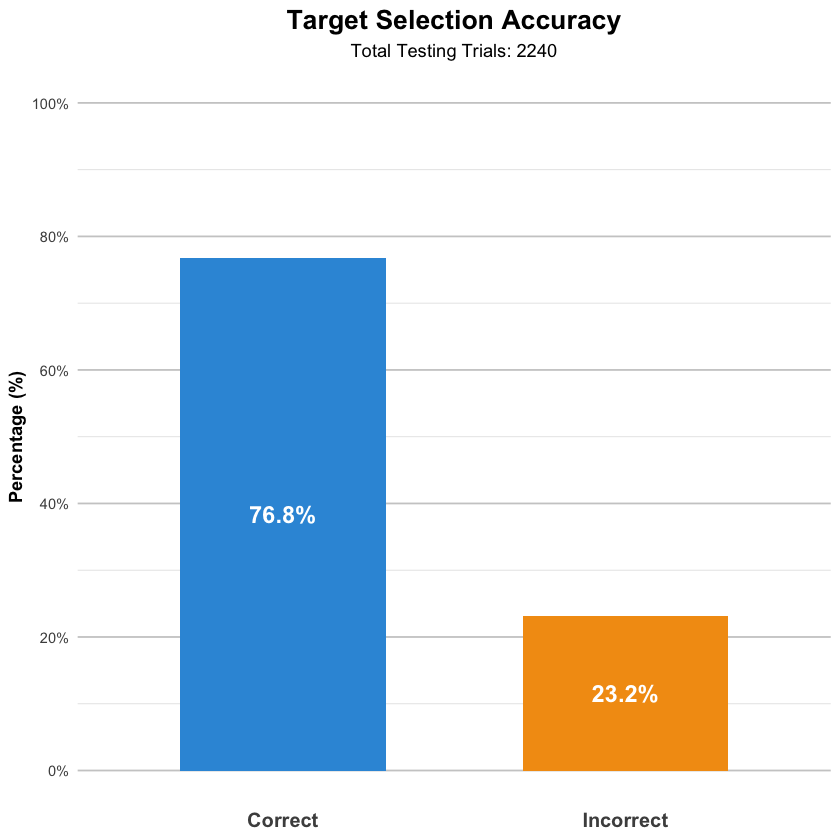

In [424]:
# Load the ggplot2 library for visualization
library(ggplot2)
library(tidyr)
library(dplyr)

# Create accuracy bar chart with percentage on y-axis
accuracy_plot <- error_analysis %>%
  mutate(
    # Create readable labels for the plot
    Result = ifelse(correct_target, "Correct", "Incorrect")
  ) %>%
  group_by(Result) %>%
  summarise(count = n()) %>%
  mutate(
    percentage = count / sum(count) * 100,
    Result = factor(Result, levels = c("Correct", "Incorrect"))  # Set factor order
  ) %>%
  ggplot(aes(x = Result, y = percentage, fill = Result)) +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = paste0(round(percentage, 1), "%")), 
            position = position_stack(vjust = 0.5),
            color = "white", fontface = "bold", size = 5) +
  scale_fill_manual(values = c("Correct" = "#3498db", "Incorrect" = "#f39c12")) +
  labs(
    title = "Target Selection Accuracy",
    subtitle = paste0("Total Testing Trials: ", nrow(error_analysis)),
    y = "Percentage (%)",
    x = NULL
  ) +
  scale_y_continuous(
    limits = c(0, 100),
    breaks = seq(0, 100, by = 20),
    minor_breaks = seq(0, 100, by = 10),
    labels = function(x) paste0(x, "%")
  ) +
  theme_minimal() +
  theme(
    legend.position = "none",
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    axis.text.x = element_text(face = "bold", size = 12),
    axis.title.y = element_text(face = "bold"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_line(color = "gray90"),
    panel.grid.major = element_line(color = "gray80")
  )

# Print the plot
print(accuracy_plot)



#### 03. Chi squared analysis by quadrant to assess balanced difficulty in the instrument


===== CONTINGENCY TABLE FOR CHI-SQUARE ANALYSIS =====
# A tibble: 4 x 5
  target_quadrant      Correct Incorrect Total Accuracy
  <chr>                  <int>     <int> <int>    <dbl>
1 Q1 (0-90<U+00B0>)        439       121   560     78.4
2 Q2 (90-180<U+00B0>)      429       131   560     76.6
3 Q3 (180-270<U+00B0>)     438       122   560     78.2
4 Q4 (270-360<U+00B0>)     414       146   560     73.9

===== CHI-SQUARE TEST RESULTS =====

	Pearson's Chi-squared test

data:  chi_square_matrix
X-squared = 4.0272, df = 3, p-value = 0.2585


Interpretation:
The chi-square test shows no statistically significant difference in accuracy rates across the four quadrants (p = 0.2585 ).

Effect Size (Cramer's V): 0.0424 
Interpretation of Cramer's V effect size:
  < 0.1: Negligible effect
  0.1 - 0.3: Small effect
  0.3 - 0.5: Medium effect
  > 0.5: Large effect

===== POST-HOC PAIRWISE COMPARISONS =====
Comparing accuracy rates between quadrant pairs with Bonferroni correction:

            

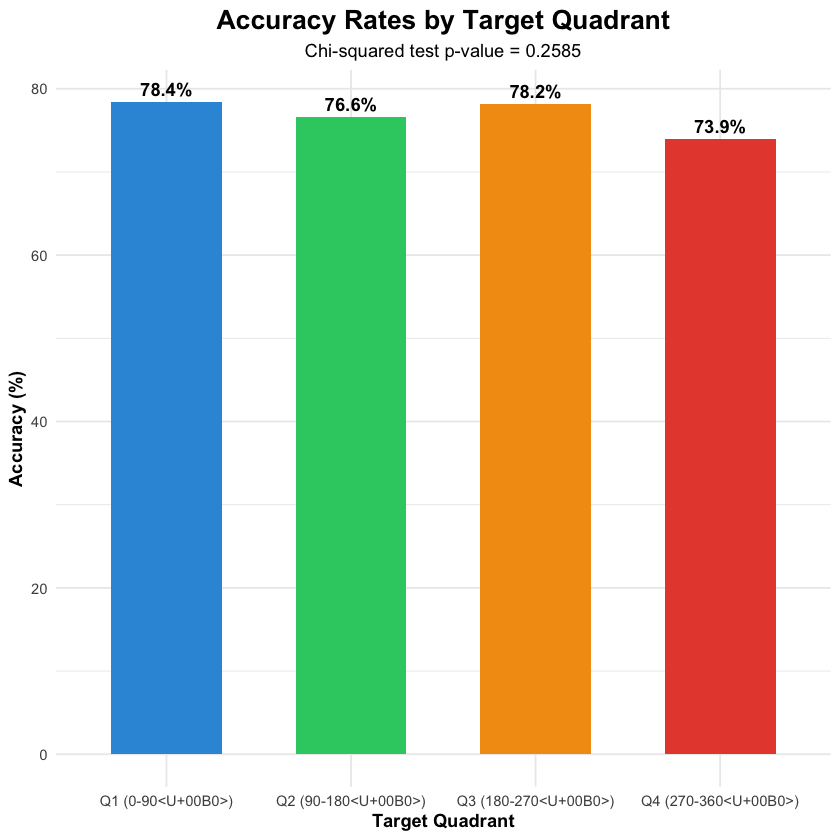

In [368]:
# Load necessary libraries
library(dplyr)
library(tidyr)
library(ggplot2)

# Create a contingency table for chi-squared test
contingency_table <- error_analysis %>%
  group_by(target_quadrant) %>%
  summarize(
    Correct = sum(error_type == "Correct", na.rm = TRUE),
    Incorrect = sum(error_type != "Correct", na.rm = TRUE),
    Total = n(),
    Accuracy = Correct / Total * 100
  ) %>%
  arrange(match(target_quadrant, c("Q1 (0-90°)", "Q2 (90-180°)", "Q3 (180-270°)", "Q4 (270-360°)")))

# Print the contingency table
cat("\n===== CONTINGENCY TABLE FOR CHI-SQUARE ANALYSIS =====\n")
print(contingency_table)

# Create a matrix for the chi-square test (excluding Total and Accuracy columns)
chi_square_matrix <- as.matrix(contingency_table[, c("Correct", "Incorrect")])
rownames(chi_square_matrix) <- contingency_table$target_quadrant

# Perform chi-square test
chi_square_result <- chisq.test(chi_square_matrix)

# Print the results of the chi-square test
cat("\n===== CHI-SQUARE TEST RESULTS =====\n")
print(chi_square_result)

# Print a more detailed interpretation
cat("\nInterpretation:\n")
if (chi_square_result$p.value < 0.05) {
  cat("The chi-square test shows a statistically significant difference in accuracy rates across the four quadrants (p =", 
      round(chi_square_result$p.value, 4), ").\n")
  
  # Calculate standardized residuals to identify which quadrants contribute most to the difference
  residuals <- chi_square_result$residuals
  cat("\nStandardized Residuals (values > |2| indicate significant contribution):\n")
  print(residuals)
  
  # Identify the quadrants that contribute most to the significant result
  significant_quadrants <- which(abs(residuals) > 2, arr.ind = TRUE)
  if (length(significant_quadrants) > 0) {
    for (i in 1:nrow(significant_quadrants)) {
      row_index <- significant_quadrants[i, "row"]
      col_index <- significant_quadrants[i, "col"]
      quadrant_name <- rownames(residuals)[row_index]
      response_type <- colnames(residuals)[col_index]
      
      direction <- ifelse(residuals[row_index, col_index] > 0, "higher", "lower")
      cat("Quadrant", quadrant_name, "has significantly", direction, 
          "than expected", response_type, "responses.\n")
    }
  } else {
    cat("No individual quadrant-response combination stands out as particularly significant.\n")
  }
} else {
  cat("The chi-square test shows no statistically significant difference in accuracy rates across the four quadrants (p =", 
      round(chi_square_result$p.value, 4), ").\n")
}

# Create a visual representation of the results
accuracy_plot <- ggplot(contingency_table, aes(x = target_quadrant, y = Accuracy, fill = target_quadrant)) +
  geom_bar(stat = "identity", width = 0.6) +
  geom_text(aes(label = paste0(round(Accuracy, 1), "%")), vjust = -0.5, fontface = "bold") +
  scale_fill_manual(values = c(
    "Q1 (0-90°)" = "#3498db",
    "Q2 (90-180°)" = "#2ecc71",
    "Q3 (180-270°)" = "#f39c12", 
    "Q4 (270-360°)" = "#e74c3c"
  )) +
  labs(
    title = "Accuracy Rates by Target Quadrant",
    subtitle = paste0("Chi-squared test p-value = ", round(chi_square_result$p.value, 4)),
    x = "Target Quadrant",
    y = "Accuracy (%)"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
    plot.subtitle = element_text(hjust = 0.5),
    axis.title = element_text(face = "bold"),
    legend.position = "none"
  )

# Display the accuracy plot
print(accuracy_plot)

# Calculate effect size (Cramer's V)
cramer_v <- sqrt(chi_square_result$statistic / (sum(chi_square_matrix) * (min(dim(chi_square_matrix)) - 1)))
cat("\nEffect Size (Cramer's V):", round(cramer_v, 4), "\n")
cat("Interpretation of Cramer's V effect size:\n")
cat("  < 0.1: Negligible effect\n")
cat("  0.1 - 0.3: Small effect\n")
cat("  0.3 - 0.5: Medium effect\n")
cat("  > 0.5: Large effect\n\n")

# Post-hoc pairwise comparisons with Bonferroni correction
cat("===== POST-HOC PAIRWISE COMPARISONS =====\n")
cat("Comparing accuracy rates between quadrant pairs with Bonferroni correction:\n\n")

# Function to perform pairwise chi-square tests
perform_pairwise_tests <- function(contingency_table) {
  quadrants <- contingency_table$target_quadrant
  num_quadrants <- length(quadrants)
  results <- data.frame(
    Comparison = character(),
    Chi_Square = numeric(),
    P_Value = numeric(),
    Adjusted_P_Value = numeric(),
    Significant = character(),
    stringsAsFactors = FALSE
  )
  
  # Number of comparisons for Bonferroni correction
  num_comparisons <- choose(num_quadrants, 2)
  
  row_index <- 1
  for (i in 1:(num_quadrants-1)) {
    for (j in (i+1):num_quadrants) {
      # Create 2x2 contingency table for this pair
      pair_matrix <- matrix(
        c(
          contingency_table$Correct[i], contingency_table$Incorrect[i],
          contingency_table$Correct[j], contingency_table$Incorrect[j]
        ),
        nrow = 2, 
        byrow = TRUE
      )
      
      # Perform chi-square test
      test_result <- chisq.test(pair_matrix)
      
      # Calculate adjusted p-value
      adjusted_p <- test_result$p.value * num_comparisons
      adjusted_p <- min(adjusted_p, 1)  # Cap at 1
      
      # Determine significance
      is_significant <- ifelse(adjusted_p < 0.05, "Yes", "No")
      
      # Add to results
      results[row_index, ] <- list(
        paste(quadrants[i], "vs", quadrants[j]),
        round(test_result$statistic, 2),
        round(test_result$p.value, 4),
        round(adjusted_p, 4),
        is_significant
      )
      
      row_index <- row_index + 1
    }
  }
  
  return(results)
}

# Perform pairwise comparisons
pairwise_results <- perform_pairwise_tests(contingency_table)
print(pairwise_results)

### 04. Analysis of Errors by Type

Visualization of Errors by Type (Formant, Frequency, Both)

Rows: 2240 Columns: 24
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (8): Handedness, languageCount, musicInstrument, musicTraining, Hand_Pa...
dbl (13): Subject_ID, Age, musicPractice, Trial Number, Target Angle, Hand A...
lgl  (3): formant_correct, frequency_correct, correct_target

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Error Type Counts (ordered):
# A tibble: 3 x 4
  error_type     n percentage percentage_label
  <fct>      <int>      <dbl> <chr>           
1 Formant      422       81.2 81.2%           
2 Frequency     49        9.4 9.4%            
3 Both          49        9.4 9.4%            

Overall accuracy: 76.8%


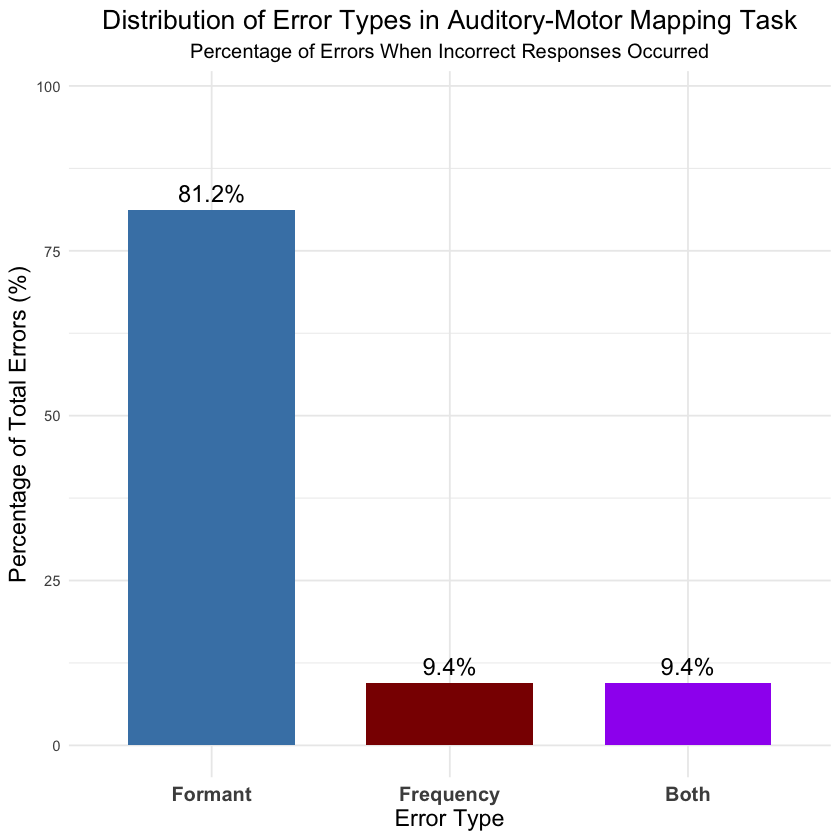

In [373]:
# Load required libraries
library(tidyverse)

# Read the error analysis data
data_path <- "demographics_performance_testing_trials_with_errors_cleaned.csv"

# Check if file exists and read it
if(file.exists(data_path)) {
  # Read the CSV file
  error_data <- read_csv(data_path)
  
  # Count error types (excluding "Correct")
  error_counts <- error_data %>%
    filter(error_type != "Correct") %>%
    count(error_type) %>%
    mutate(
      percentage = n / sum(n) * 100,
      percentage_label = paste0(round(percentage, 1), "%")
    )
  
  # Set the order of error types
  error_counts$error_type <- factor(error_counts$error_type, 
                                   levels = c("Formant", "Frequency", "Both"))
  
  # Create bar chart with percentages
  p <- ggplot(error_counts, aes(x = error_type, y = percentage, fill = error_type)) +
    geom_bar(stat = "identity", width = 0.7) +
    geom_text(aes(label = percentage_label), vjust = -0.5, size = 5) +
    scale_fill_manual(values = c("Formant" = "steelblue", "Frequency" = "darkred", "Both" = "purple")) +
    labs(
      title = "Distribution of Error Types in Auditory-Motor Mapping Task",
      subtitle = "Percentage of Errors When Incorrect Responses Occurred",
      x = "Error Type",
      y = "Percentage of Total Errors (%)"
    ) +
    theme_minimal() +
    theme(
      legend.position = "none",
      axis.text.x = element_text(size = 12, face = "bold"),
      axis.title = element_text(size = 14),
      plot.title = element_text(size = 16, hjust = 0.5),
      plot.subtitle = element_text(size = 12, hjust = 0.5)
    ) +
    ylim(0, max(error_counts$percentage) * 1.2) # Add space above bars for labels
  
  # Save the plot
  ggsave("error_analysis.png", p, width = 8, height = 6, dpi = 300)
  
  # Display the plot
  print(p)
  
  # Print summary of results with ordered error types
  cat("\nError Type Counts (ordered):\n")
  error_summary <- error_counts %>%
    arrange(match(error_type, c("Formant", "Frequency", "Both"))) %>%
    mutate(percentage = round(percentage, 1))
  print(error_summary)
  
  # Calculate overall accuracy
  overall_accuracy <- mean(error_data$error_type == "Correct") * 100
  cat(sprintf("\nOverall accuracy: %.1f%%\n", overall_accuracy))
  
} else {
  cat("Error: CSV file not found at path:", data_path, "\n")
  cat("Please provide the correct path to your CSV file.\n")
}

### 05. Balanced Logistic Regression based on SubGroups as Predictors

In [437]:
# Load required libraries
library(tidyverse)
library(caret)     # For modeling
library(pROC)      # For ROC curves
library(nnet)      # For multinomial regression

# Read the error analysis data
data_path <- "demographics_performance_testing_trials_with_errors_cleaned.csv"

# Check if file exists and read it
if(file.exists(data_path)) {
  # Read the CSV file
  error_data <- read_csv(data_path)
  
  # First, flatten the dataset to keep only unique participants by Subject_ID
  # This creates the participant data with one row per subject
  unique_participants <- error_data[!duplicated(error_data$Subject_ID), ]
  
  # Count how many unique participants you have
  num_participants <- nrow(unique_participants)
  print(paste("Number of unique participants:", num_participants))
  
  # Clean categorical variables for participants
  clean_categorical_variables <- function(participant_data) {
    # Load required libraries
    library(dplyr)
    
    # Clean and organize categorical variables
    participant_data <- participant_data %>%
      mutate(
        # Convert basic factors
        musicInstrument = as.factor(musicInstrument),
        
        # Clean raw values by removing quotes
        musicTraining_raw = gsub('"', '', as.character(musicTraining)),
        musicPractice_raw = gsub('"', '', as.character(musicPractice)),
        languageCount_raw = gsub('"', '', as.character(languageCount)),
        handedness_raw = gsub('"', '', as.character(Handedness)),
        
        # Create properly ordered music training groups
        musicTraining_group = factor(
          case_when(
            musicTraining_raw == "0-1" ~ "0-1 yrs",
            musicTraining_raw == "1-5" ~ "1-5 yrs",
            musicTraining_raw == "5-10" ~ "5-10 yrs",
            musicTraining_raw == "10+" ~ "10+ yrs",
            TRUE ~ "Unknown"
          ),
          levels = c("0-1 yrs", "1-5 yrs", "5-10 yrs", "10+ yrs", "Unknown"),
          ordered = FALSE
        ),
        
        # Create properly ordered music practice groups
        musicPractice_group = factor(
          case_when(
            musicPractice_raw == "0" ~ "No Weekly Practice",
            musicPractice_raw %in% c("1", "2", "3", "4") ~ "Weekly Practice 1-4 hrs",
            musicPractice_raw %in% c("5", "6", "7", "8", "9") ~ "Weekly Practice 5-9 hrs",
            musicPractice_raw %in% c("10", "11", "12", "13", "14", "15") ~ "Weekly Practice 10+ hrs",
            TRUE ~ "Unknown"
          ),
          levels = c("No Weekly Practice", "Weekly Practice 1-4 hrs", "Weekly Practice 5-9 hrs", "Weekly Practice 10+ hrs", "Unknown"),
          ordered = FALSE
        ),
        
        # Create properly ordered language count groups
        languageCount_group = factor(
          case_when(
            languageCount_raw == "1" ~ "Monolingual",
            languageCount_raw == "2" ~ "Bilingual",
            languageCount_raw == "3+" ~ "Multilingual",
            TRUE ~ "Unknown"
          ),
          levels = c("Monolingual", "Bilingual", "Multilingual", "Unknown"),
          ordered = FALSE
        ),
        
        # Create handedness groups if needed
        handedness_group = factor(handedness_raw)
      )
    
    return(participant_data)
  }
  
  # Apply the cleaning function to create the categorical variables
  unique_participants_cleaned <- clean_categorical_variables(unique_participants)
  
  # Verify the new columns are created
  cat("\nSummary of musicTraining_group:\n")
  print(table(unique_participants_cleaned$musicTraining_group))
  
  cat("\nSummary of musicPractice_group:\n")
  print(table(unique_participants_cleaned$musicPractice_group))
  
  cat("\nSummary of languageCount_group:\n")
  print(table(unique_participants_cleaned$languageCount_group))
  
  # Now merge the cleaned participant data back with the error data
  # First create a lookup dataframe with just the Subject_ID and the categorical variables
  participant_lookup <- unique_participants_cleaned %>%
  dplyr::select(Subject_ID, 
         musicTraining_group, 
         musicPractice_group, 
         musicInstrument_cat = musicInstrument,  # Rename to avoid conflicts
         languageCount_group)
  
  # Merge with the original error data
  error_data_with_categories <- error_data %>%
    left_join(participant_lookup, by = "Subject_ID")
  
  # Check the column names after joining
  cat("\nColumn names after joining:\n")
  print(names(error_data_with_categories))
  
  # Define the predictors to use in the model (using the new column names)
  predictors <- c(
    "musicTraining_group", 
    "musicPractice_group", 
    "musicInstrument_cat",  # Updated name
    "languageCount_group"
  )
  
  # First, check the distribution of error types
  error_counts <- error_data_with_categories %>%
    filter(error_type != "Correct") %>%
    count(error_type) %>%
    arrange(desc(n))
  
  cat("\nDistribution of error types:\n")
  print(error_counts)
  
  # Use the multinomial approach instead of binary classification
  # Limit to just the error trials
  error_trials <- error_data_with_categories %>%
    filter(error_type != "Correct")
  
  # Check that we have the error trials
  cat("\nNumber of error trials:", nrow(error_trials), "\n")
  
  # Ensure error_type is a factor with the correct ordering
  error_trials$error_type <- factor(error_trials$error_type, 
                                  levels = c("Formant", "Frequency", "Both"))
  
  # Verify error types are present
  cat("\nVerifying error types after filtering:\n")
  print(table(error_trials$error_type))
  
  # Multinomial logistic regression
  # Use nnet package for multinomial logistic regression
  library(nnet)
  
  # Fit the multinomial model
  formula <- as.formula(paste("error_type ~", paste(predictors, collapse = " + ")))
  
  # Try to fit the model with error handling
  multinomial_model <- tryCatch({
    multinom(formula, data = error_trials)
  }, error = function(e) {
    cat("\nERROR in multinomial model training:", e$message, "\n")
    return(NULL)
  })
  
  # If model training succeeded, show results
  if(!is.null(multinomial_model)) {
    # Show model summary
    cat("\nMultinomial Logistic Regression Model Summary:\n")
    print(summary(multinomial_model))
    
    # Calculate and show z-scores and p-values
    cat("\nCoefficients, z-scores and p-values:\n")
    z_scores <- summary(multinomial_model)$coefficients / summary(multinomial_model)$standard.errors
    p_values <- (1 - pnorm(abs(z_scores))) * 2
    coef_table <- cbind(summary(multinomial_model)$coefficients, z_scores, p_values)
    colnames(coef_table) <- c("Coefficient", "Z-score", "P-value")
    print(coef_table)
    
    # Make predictions
    predictions <- predict(multinomial_model, newdata = error_trials, type = "class")
    
    # Create confusion matrix
    conf_matrix <- table(Actual = error_trials$error_type, Predicted = predictions)
    cat("\nConfusion Matrix:\n")
    print(conf_matrix)
    
    # Calculate accuracy
    accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
    cat("\nOverall accuracy:", round(accuracy * 100, 2), "%\n")
    
    # Calculate precision, recall for each class
    cat("\nPer-class metrics:\n")
    n_classes <- nrow(conf_matrix)
    class_metrics <- data.frame(
      Class = rownames(conf_matrix),
      Precision = numeric(n_classes),
      Recall = numeric(n_classes),
      F1_Score = numeric(n_classes)
    )
    
    for(i in 1:n_classes) {
      tp <- conf_matrix[i,i]
      fp <- sum(conf_matrix[,i]) - tp
      fn <- sum(conf_matrix[i,]) - tp
      
      precision <- if(tp + fp > 0) tp / (tp + fp) else 0
      recall <- if(tp + fn > 0) tp / (tp + fn) else 0
      f1 <- if(precision + recall > 0) 2 * precision * recall / (precision + recall) else 0
      
      class_metrics$Precision[i] <- precision
      class_metrics$Recall[i] <- recall
      class_metrics$F1_Score[i] <- f1
    }
    
    print(class_metrics)
    
    # Extract coefficients
    model_coefs <- coef(multinomial_model)
    
    # Convert to data frame for easier manipulation
    coef_df <- as.data.frame(model_coefs)
    
    # Add error type as a column
    coef_df$error_type <- rownames(coef_df)
    
    # Reshape from wide to long format
    coef_long <- coef_df %>%
      pivot_longer(cols = -error_type, 
                   names_to = "predictor", 
                   values_to = "coefficient")
    
    # Remove intercept for visualization
    coef_long <- coef_long %>%
      filter(predictor != "(Intercept)")
    
    # Simplify predictor names
    coef_long <- coef_long %>%
      mutate(
        predictor = gsub("musicTraining_group", "Music Training: ", predictor),
        predictor = gsub("musicPractice_group", "Practice Hours: ", predictor),
        predictor = gsub("languageCount_group", "Languages: ", predictor),
        predictor = gsub("musicInstrument_cat", "Instrument: ", predictor)
      )
    
    # Plot
    p <- ggplot(coef_long, aes(x = reorder(predictor, abs(coefficient)), 
                             y = coefficient, 
                             fill = error_type)) +
      geom_bar(stat = "identity", position = "dodge") +
      coord_flip() +
      scale_fill_manual(values = c("Frequency" = "darkred", "Both" = "purple")) +
      labs(
        title = "Predictor Importance by Error Type",
        subtitle = "Coefficients from Multinomial Logistic Regression",
        x = "Predictor",
        y = "Coefficient Value (higher absolute value = stronger effect)",
        fill = "Error Type"
      ) +
      theme_minimal() +
      theme(
        legend.position = "bottom",
        axis.text.y = element_text(size = 9),
        plot.title = element_text(size = 14, face = "bold"),
        plot.subtitle = element_text(size = 11)
      )
    
    # Save the plot
    ggsave("error_predictors_multinomial.png", p, width = 10, height = 8, dpi = 300)
    
    # Display the plot
    print(p)
    
    # Create a simplified visualization of confusion matrix
    # First make predictions
    predictions <- predict(multinomial_model, newdata = error_trials, type = "class")
    
    # Create confusion matrix
    conf_matrix <- table(Actual = error_trials$error_type, Predicted = predictions)
    
    # Convert to data frame for ggplot
    conf_df <- as.data.frame(conf_matrix)
    names(conf_df) <- c("Actual", "Predicted", "Frequency")
    
    # Create heatmap
    p_conf <- ggplot(conf_df, aes(x = Predicted, y = Actual, fill = Frequency)) +
      geom_tile() +
      geom_text(aes(label = Frequency)) +
      scale_fill_gradient(low = "white", high = "steelblue") +
      labs(
        title = "Confusion Matrix for Error Type Prediction",
        x = "Predicted Error Type",
        y = "Actual Error Type"
      ) +
      theme_minimal() +
      theme(
        plot.title = element_text(size = 14, face = "bold"),
        axis.text = element_text(size = 10)
      )
    
    # Save the plot
    ggsave("error_confusion_matrix.png", p_conf, width = 8, height = 6, dpi = 300)
    
    # Display the plot
    print(p_conf)
    
    # Create a simplified interpretation table
    cat("\n\nKEY FINDINGS FROM THE MODEL:\n")
    cat("==========================\n\n")
    
    # Identify strongest predictors by taking absolute values
    strongest_predictors <- coef_long %>%
      group_by(error_type) %>%
      arrange(desc(abs(coefficient))) %>%
      slice_head(n = 3)
    
    # Display findings by error type
    for(err_type in unique(strongest_predictors$error_type)) {
      cat("For", err_type, "errors, the strongest predictors are:\n")
      
      predictors_for_type <- strongest_predictors %>%
        filter(error_type == err_type)
      
      for(i in 1:nrow(predictors_for_type)) {
        pred <- predictors_for_type$predictor[i]
        coef_val <- predictors_for_type$coefficient[i]
        direction <- ifelse(coef_val > 0, "increases", "decreases")
        
        cat(sprintf("%d. %s (coefficient: %.2f) - %s likelihood\n", 
                    i, pred, coef_val, direction))
      }
      cat("\n")
    }
  } else {
    cat("\nNo multinomial model was created. Analysis complete.\n")
  }
} else {
  cat("Error: CSV file not found at path:", data_path, "\n")
}

Rows: 2240 Columns: 24
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (8): Handedness, languageCount, musicInstrument, musicTraining, Hand_Pa...
dbl (13): Subject_ID, Age, musicPractice, Trial Number, Target Angle, Hand A...
lgl  (3): formant_correct, frequency_correct, correct_target

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Number of unique participants: 28"

Summary of musicTraining_group:

 0-1 yrs  1-5 yrs 5-10 yrs  10+ yrs  Unknown 
       6        5        7       10        0 

Summary of musicPractice_group:

     No Weekly Practice Weekly Practice 1-4 hrs Weekly Practice 5-9 hrs 
                     11                      12                       3 
Weekly Practice 10+ hrs                 Unknown 
                      2                       0 

Summary of languageCount_group:

 Monolingual    Bilingual Multilingual      Unknown 
          11           12            5            0 

Column names after joining:
 [1] "Subject_ID"             "Age"                    "Handedness"            
 [4] "languageCount"          "musicInstrument"        "musicPractice"         
 [7] "musicTraining"          "Trial Number"           "Target Angle"          
[10] "Hand Angle"             "RT"                     "MT"                    
[13] "Hand_Path"              "target_quadrant"        "hand_quadra

Warning message in sqrt(diag(vc)):
"NaNs produced"


Call:
multinom(formula = formula, data = error_trials)

Coefficients:
          (Intercept) musicTraining_group1-5 yrs musicTraining_group5-10 yrs
Frequency   -3.022746                 -0.4687005                   -1.044212
Both        -2.212448                  0.3852640                   -1.057011
          musicTraining_group10+ yrs musicTraining_groupUnknown
Frequency                  -4.142504                          0
Both                       -2.902013                          0
          musicPractice_groupWeekly Practice 1-4 hrs
Frequency                                 -0.0331312
Both                                       1.3823369
          musicPractice_groupWeekly Practice 5-9 hrs
Frequency                                  -30.29148
Both                                       -26.87907
          musicPractice_groupWeekly Practice 10+ hrs musicPractice_groupUnknown
Frequency                                  -9.989443                          0
Both                         

Warning message in sqrt(diag(vc)):
"NaNs produced"
Warning message in sqrt(diag(vc)):
"NaNs produced"
Warning message in sqrt(diag(vc)):
"NaNs produced"


ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [2] not equal to array extent


### 06. Principal Component Analysis (PCA)


The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages

The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages

The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages

The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages

The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages

The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages

The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages

The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages

The downloaded binary packages 

also installing the dependency 'GPArotation'





The downloaded binary packages are in
	/var/folders/zy/7fkr_dls50x53mn7v230d3k00000gp/T//RtmpUwSeSu/downloaded_packages



Attaching package: 'psych'


The following object is masked from 'package:outliers':

    outlier


The following objects are masked from 'package:ggplot2':

    %+%, alpha




Columns with zero variance: musicTraining_group_Unknown musicPractice_group_Unknown languageCount_group_Unknown 
Removed 3 columns with zero variance
Importance of components:
                         PC1    PC2    PC3    PC4    PC5     PC6    PC7     PC8
Standard deviation     2.011 1.3501 1.2898 1.1862 1.1457 1.01867 0.9319 0.78807
Proportion of Variance 0.311 0.1402 0.1280 0.1082 0.1010 0.07982 0.0668 0.04777
Cumulative Proportion  0.311 0.4512 0.5792 0.6874 0.7884 0.86818 0.9350 0.98275
                           PC9      PC10      PC11      PC12     PC13
Standard deviation     0.47348 3.803e-16 2.137e-16 1.638e-16 5.42e-17
Proportion of Variance 0.01725 0.000e+00 0.000e+00 0.000e+00 0.00e+00
Cumulative Proportion  1.00000 1.000e+00 1.000e+00 1.000e+00 1.00e+00


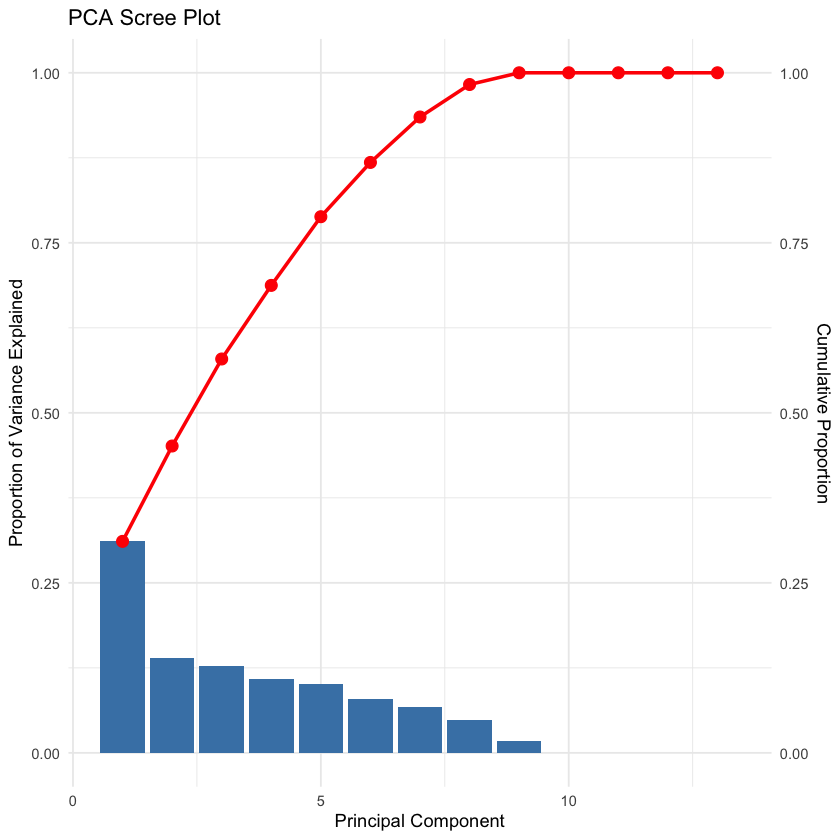

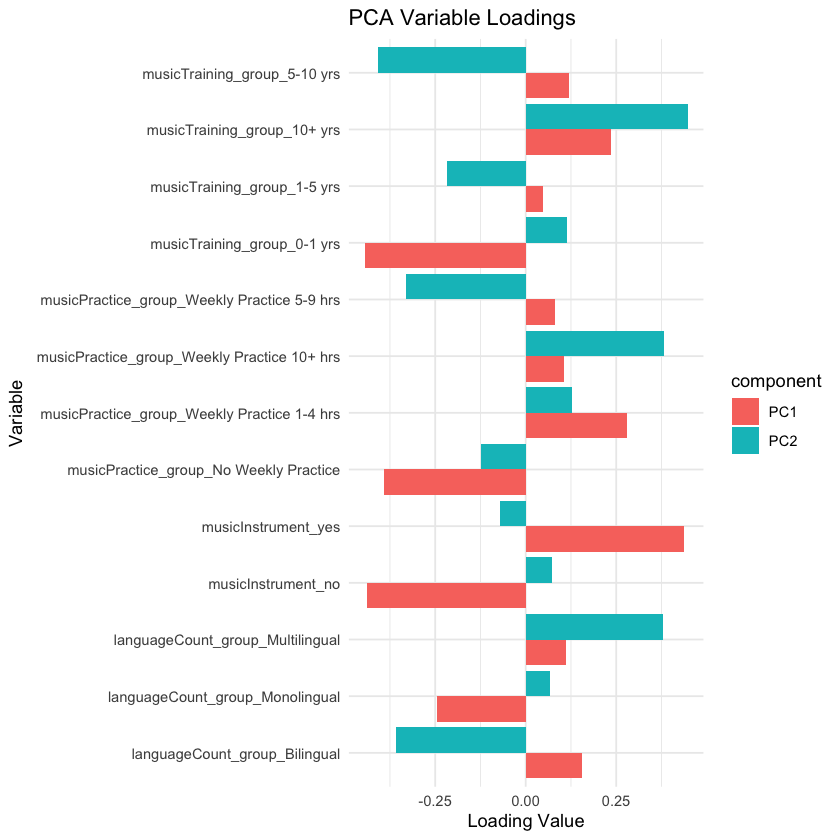

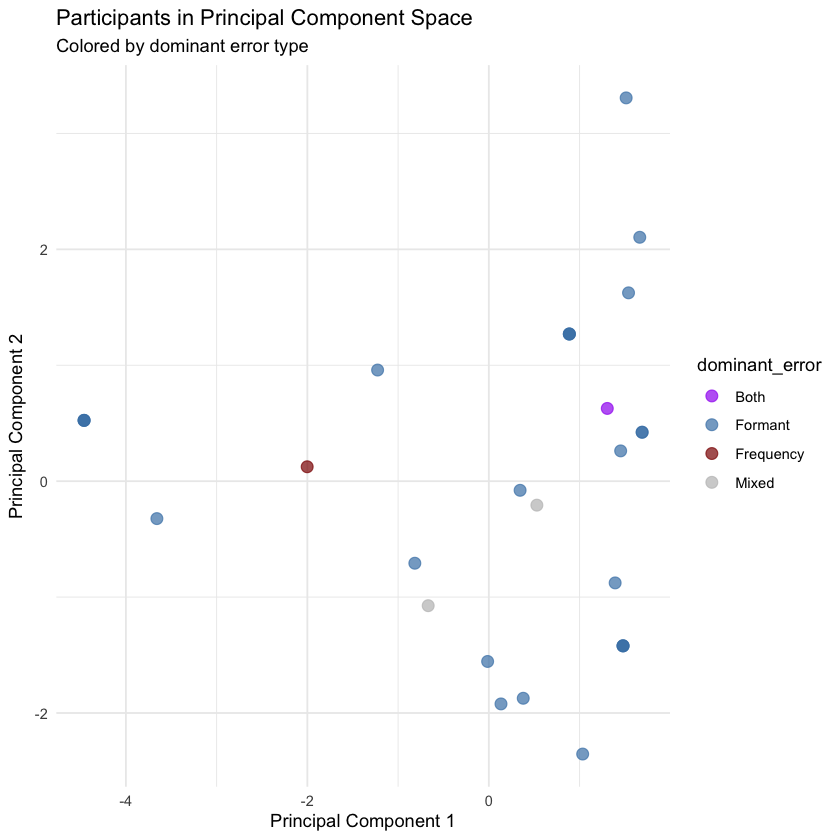

[1] "Correlations between PCs and error types:"
                   PC1           PC2           PC3 Formant Frequency Both
PC1       1.000000e+00  9.088627e-17  2.330211e-16      NA        NA   NA
PC2       9.088627e-17  1.000000e+00 -7.228926e-17      NA        NA   NA
PC3       2.330211e-16 -7.228926e-17  1.000000e+00      NA        NA   NA
Formant             NA            NA            NA       1        NA   NA
Frequency           NA            NA            NA      NA         1   NA
Both                NA            NA            NA      NA        NA    1


Warning message:
"Removed 24 rows containing missing values or values outside the scale range
(`geom_text()`)."
Warning message:
"Removed 24 rows containing missing values or values outside the scale range
(`geom_text()`)."


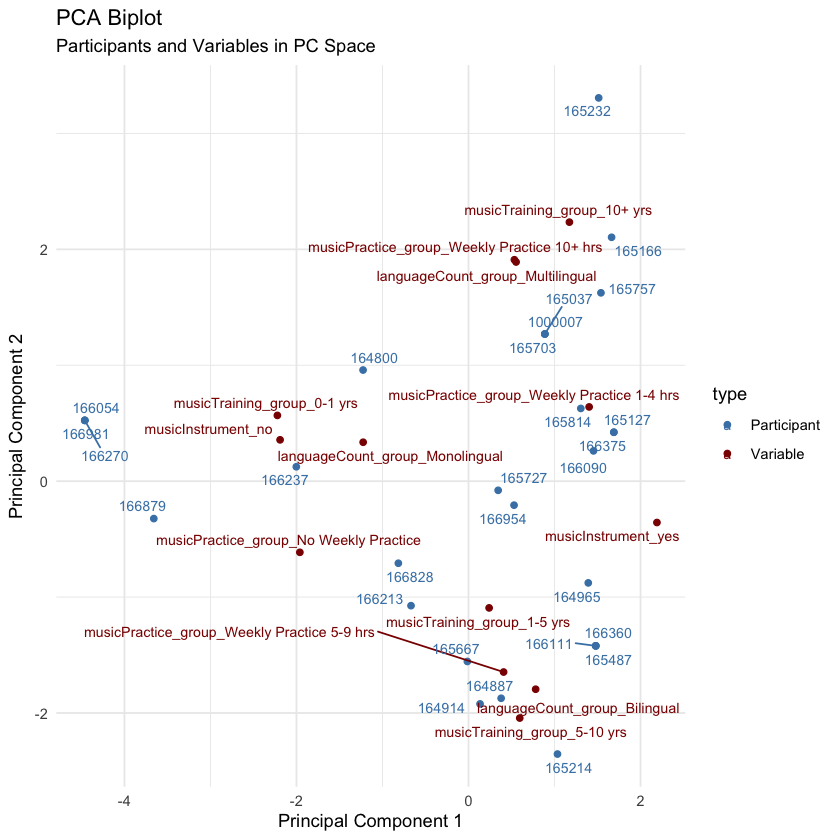



PRINCIPAL COMPONENT INTERPRETATIONS:

PC1 (31.1% of variance):
                                                                               Variable
musicTraining_group_0-1 yrs                                 musicTraining_group_0-1 yrs
musicInstrument_yes                                                 musicInstrument_yes
musicInstrument_no                                                   musicInstrument_no
musicPractice_group_No Weekly Practice           musicPractice_group_No Weekly Practice
musicPractice_group_Weekly Practice 1-4 hrs musicPractice_group_Weekly Practice 1-4 hrs
                                               Loading Direction
musicTraining_group_0-1 yrs                 -0.4443973  Negative
musicInstrument_yes                          0.4381159  Positive
musicInstrument_no                          -0.4381159  Negative
musicPractice_group_No Weekly Practice      -0.3921316  Negative
musicPractice_group_Weekly Practice 1-4 hrs  0.2804867  Positive
Positively associ

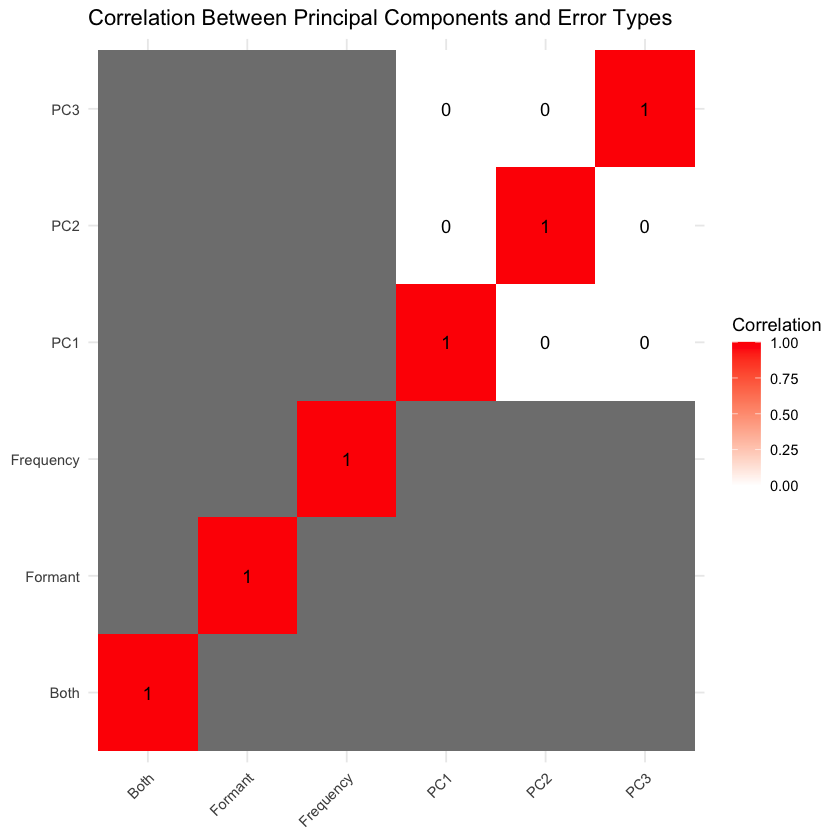


Correlations between original variables and principal components:
                                               PC1    PC2    PC3
musicTraining_group_0-1 yrs                 -0.894  0.153 -0.076
musicTraining_group_1-5 yrs                  0.096 -0.295  0.305
musicTraining_group_5-10 yrs                 0.240 -0.552  0.167
musicTraining_group_10+ yrs                  0.472  0.603 -0.330
musicPractice_group_No Weekly Practice      -0.788 -0.166 -0.093
musicPractice_group_Weekly Practice 1-4 hrs  0.564  0.173  0.462
musicPractice_group_Weekly Practice 5-9 hrs  0.164 -0.445 -0.184
musicPractice_group_Weekly Practice 10+ hrs  0.214  0.516 -0.490
musicInstrument_no                          -0.881  0.096 -0.161
musicInstrument_yes                          0.881 -0.096  0.161
languageCount_group_Monolingual             -0.493  0.091  0.573
languageCount_group_Bilingual                0.314 -0.485 -0.717
languageCount_group_Multilingual             0.222  0.511  0.195

Top 10 variables most 

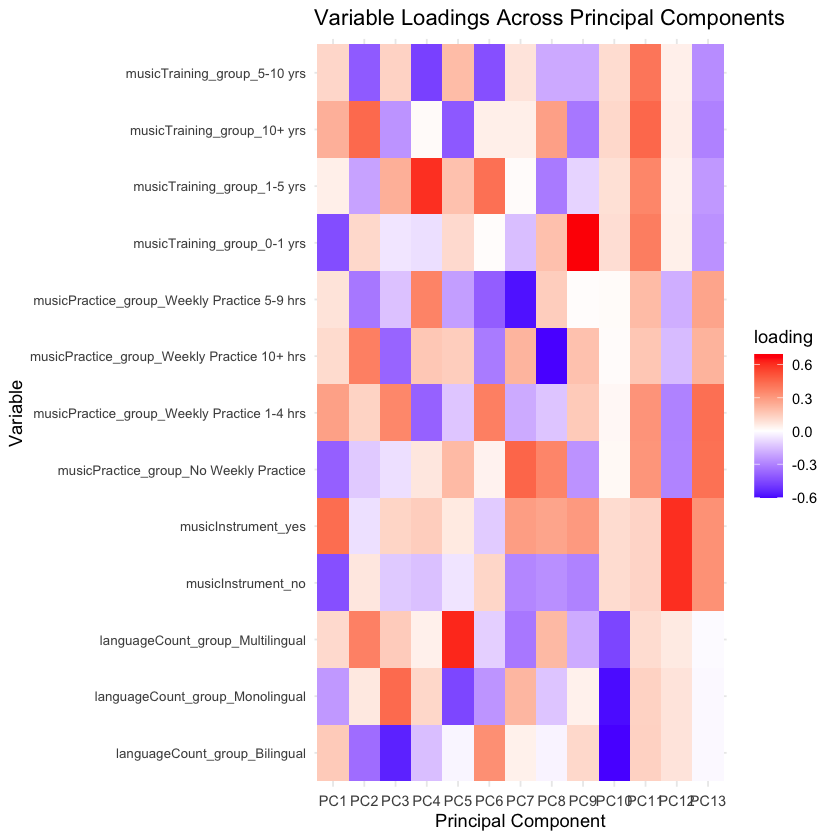

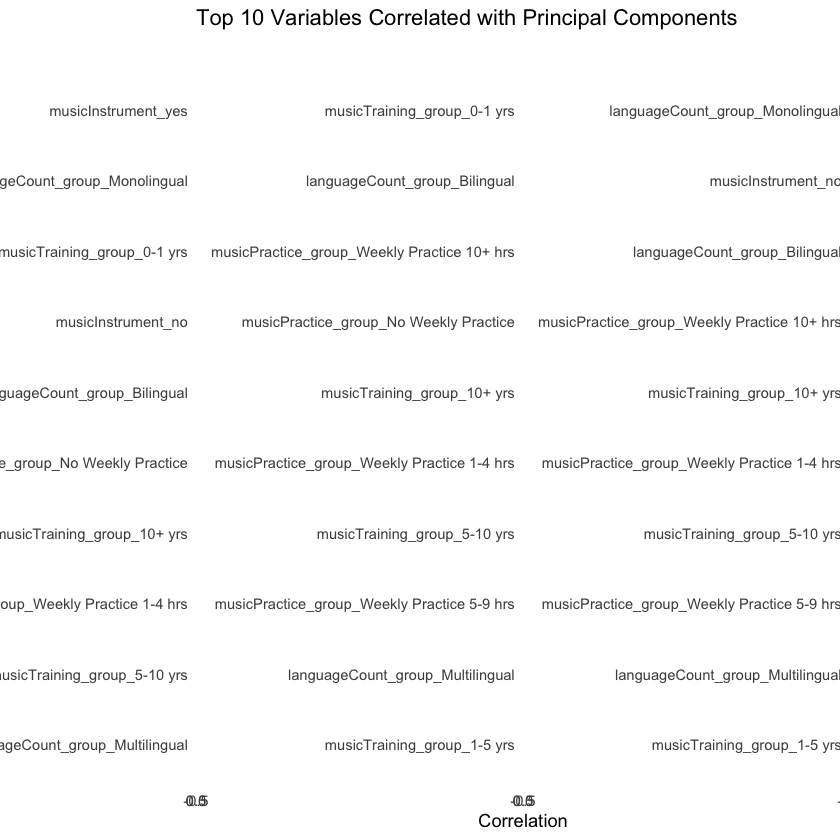

In [ ]:
install.packages("fastDummies")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggrepel")
install.packages("nnet")
install.packages("caret")
install.packages("pROC")
install.packages("outliers")
install.packages("psych")
# Load required libraries
library(tidyverse)
library(caret)
library(pROC)
library(nnet)
library(ggrepel)
library(outliers)
library(psych)
library(fastDummies)
library(ggplot2)
library(dplyr)
library(tidyr)

# Add PCA analysis after your existing code
# Assuming error_data_with_categories already exists

# Prepare data for PCA
# Extract participant-level data with predictor variables
participant_data <- unique_participants_cleaned %>%
  select(Subject_ID, musicTraining_group, musicPractice_group, 
         musicInstrument, languageCount_group)

# Convert categorical variables to numeric for PCA
# This requires creating dummy variables
library(fastDummies)

pca_data <- dummy_cols(participant_data, 
                      select_columns = c("musicTraining_group", "musicPractice_group", 
                                       "musicInstrument", "languageCount_group"),
                      remove_selected_columns = TRUE)

# Remove the ID column for PCA
pca_data <- pca_data %>%
  select(-Subject_ID)

# Check for columns with zero variance
var_cols <- apply(pca_data, 2, var)
zero_var_cols <- names(var_cols[var_cols == 0])

cat("Columns with zero variance:", zero_var_cols, "\n")

# Remove columns with zero variance
if(length(zero_var_cols) > 0) {
  pca_data <- pca_data %>% select(-all_of(zero_var_cols))
  cat("Removed", length(zero_var_cols), "columns with zero variance\n")
}

# Check if we still have enough variables for PCA
if(ncol(pca_data) < 2) {
  cat("Insufficient variables for PCA after removing zero-variance columns\n")
} else {
  # Run PCA
  pca_result <- prcomp(pca_data, scale. = TRUE)
  
  # Summary of PCA results
  pca_summary <- summary(pca_result)
  print(pca_summary)
  
  # Create scree plot to visualize variance explained
  var_explained <- pca_result$sdev^2 / sum(pca_result$sdev^2)
  cumulative_var <- cumsum(var_explained)
  
  scree_data <- data.frame(
    Component = 1:length(var_explained),
    Variance_Explained = var_explained,
    Cumulative_Variance = cumulative_var
  )
  
  # Plot variance explained
  p_scree <- ggplot(scree_data, aes(x = Component, y = Variance_Explained)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    geom_line(aes(y = Cumulative_Variance), color = "red", size = 1) +
    geom_point(aes(y = Cumulative_Variance), color = "red", size = 3) +
    labs(
      title = "PCA Scree Plot",
      x = "Principal Component",
      y = "Proportion of Variance Explained"
    ) +
    theme_minimal() +
    scale_y_continuous(
      sec.axis = sec_axis(~., name = "Cumulative Proportion")
    )
  
  print(p_scree)
  ggsave("pca_scree_plot.png", p_scree, width = 8, height = 6, dpi = 300)
  
  # Examine variable loadings
  loadings <- as.data.frame(pca_result$rotation)
  loadings$variable <- rownames(loadings)
  loadings_long <- pivot_longer(loadings, 
                               cols = starts_with("PC"), 
                               names_to = "component",
                               values_to = "loading")
  
  # Plot variable loadings for first 2 PCs
  p_loadings <- ggplot(loadings_long %>% 
                      filter(component %in% c("PC1", "PC2")), 
                    aes(x = variable, y = loading, fill = component)) +
    geom_bar(stat = "identity", position = "dodge") +
    coord_flip() +
    labs(
      title = "PCA Variable Loadings",
      x = "Variable",
      y = "Loading Value"
    ) +
    theme_minimal()
  
  print(p_loadings)
  ggsave("pca_loadings.png", p_loadings, width = 10, height = 8, dpi = 300)
  
  # Extract PC scores for each participant
  pc_scores <- as.data.frame(pca_result$x)
  pc_scores$Subject_ID <- participant_data$Subject_ID
  
  # Join PC scores with error data
  pc_with_errors <- pc_scores %>%
    left_join(
      error_data_with_categories %>%
        filter(error_type != "Correct") %>%
        group_by(Subject_ID, error_type) %>%
        summarize(error_count = n(), .groups = "drop") %>%
        pivot_wider(names_from = error_type, 
                   values_from = error_count, 
                   values_fill = 0),
      by = "Subject_ID"
    )
  
  # Handle potential missing error columns
  if(!"Formant" %in% names(pc_with_errors)) pc_with_errors$Formant <- 0
  if(!"Frequency" %in% names(pc_with_errors)) pc_with_errors$Frequency <- 0
  if(!"Both" %in% names(pc_with_errors)) pc_with_errors$Both <- 0
  
  # Plot participants in PC space, colored by dominant error type
  pc_with_errors <- pc_with_errors %>%
    mutate(
      total_errors = Formant + Frequency + Both,
      formant_pct = ifelse(total_errors > 0, Formant / total_errors, 0),
      frequency_pct = ifelse(total_errors > 0, Frequency / total_errors, 0),
      both_pct = ifelse(total_errors > 0, Both / total_errors, 0),
      dominant_error = case_when(
        formant_pct > frequency_pct & formant_pct > both_pct ~ "Formant",
        frequency_pct > formant_pct & frequency_pct > both_pct ~ "Frequency",
        both_pct > formant_pct & both_pct > frequency_pct ~ "Both",
        TRUE ~ "Mixed"
      )
    )
  
  p_participants <- ggplot(pc_with_errors, aes(x = PC1, y = PC2, color = dominant_error)) +
    geom_point(size = 3, alpha = 0.7) +
    labs(
      title = "Participants in Principal Component Space",
      subtitle = "Colored by dominant error type",
      x = "Principal Component 1",
      y = "Principal Component 2"
    ) +
    theme_minimal() +
    scale_color_manual(values = c("Formant" = "steelblue", 
                                "Frequency" = "darkred", 
                                "Both" = "purple",
                                "Mixed" = "gray"))
  
  print(p_participants)
  ggsave("pca_participants.png", p_participants, width = 8, height = 6, dpi = 300)
  
  # Alternative: Biplot to show both participants and variables
  biplot_data <- rbind(
    # Participant scores (scaled for visibility)
    data.frame(
      x = pc_scores$PC1,
      y = pc_scores$PC2,
      label = participant_data$Subject_ID,
      type = "Participant"
    ),
    # Variable loadings (scaled for visibility)
    data.frame(
      x = pca_result$rotation[, 1] * 5,
      y = pca_result$rotation[, 2] * 5,
      label = rownames(pca_result$rotation),
      type = "Variable"
    )
  )
  
  p_biplot <- ggplot(biplot_data, aes(x = x, y = y, color = type, label = label)) +
    geom_point() +
    geom_text_repel(size = 3, max.overlaps = 20) +
    labs(
      title = "PCA Biplot",
      subtitle = "Participants and Variables in PC Space",
      x = "Principal Component 1",
      y = "Principal Component 2"
    ) +
    theme_minimal() +
    scale_color_manual(values = c("Participant" = "steelblue", "Variable" = "darkred"))
  
  print(p_biplot)
  ggsave("pca_biplot.png", p_biplot, width = 10, height = 8, dpi = 300)
  
  # Examine relationship between PCs and error rates
  # Create correlation plots
  pca_correlations <- pc_with_errors %>%
    select(PC1, PC2, PC3, Formant, Frequency, Both) %>%
    cor()
  
  print("Correlations between PCs and error types:")
  print(pca_correlations)
  
  # Create a heatmap of correlations
  pca_cor_long <- as.data.frame(pca_correlations) %>%
    rownames_to_column("Variable1") %>%
    pivot_longer(cols = -Variable1, 
                names_to = "Variable2", 
                values_to = "Correlation")
  
  p_heatmap <- ggplot(pca_cor_long, aes(x = Variable1, y = Variable2, fill = Correlation)) +
    geom_tile() +
    geom_text(aes(label = round(Correlation, 2))) +
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
    labs(
      title = "Correlation Between Principal Components and Error Types",
      x = NULL,
      y = NULL
    ) +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  
  print(p_heatmap)
  ggsave("pca_correlation_heatmap.png", p_heatmap, width = 8, height = 6, dpi = 300)
}

# After running the PCA analysis, add this code to interpret the principal components

# Extract the loading matrix
loadings <- pca_result$rotation

# Get the top contributors to each principal component
interpret_pc <- function(pc_loadings, n_top = 5) {
  # Sort the loadings by absolute value
  sorted_idx <- order(abs(pc_loadings), decreasing = TRUE)
  
  # Get the top n variables
  top_vars <- names(pc_loadings)[sorted_idx[1:min(n_top, length(pc_loadings))]]
  top_loadings <- pc_loadings[sorted_idx[1:min(n_top, length(pc_loadings))]]
  
  # Create a data frame for easier display
  result <- data.frame(
    Variable = top_vars,
    Loading = top_loadings,
    Direction = ifelse(top_loadings > 0, "Positive", "Negative")
  )
  
  return(result)
}

# Interpret the first few PCs
num_pcs <- min(3, ncol(loadings))  # Look at first 3 PCs or fewer if we have less
pc_interpretations <- list()

cat("\n\nPRINCIPAL COMPONENT INTERPRETATIONS:\n")
cat("==================================\n\n")

for(i in 1:num_pcs) {
  pc_name <- paste0("PC", i)
  
  # Calculate variance explained by this PC
  variance_explained <- var_explained[i]
  
  cat(paste0(pc_name, " (", round(variance_explained * 100, 2), "% of variance):\n"))
  
  # Get interpretation
  pc_interpretations[[i]] <- interpret_pc(loadings[, i])
  
  # Display interpretation
  print(pc_interpretations[[i]])
  
  # Provide textual summary
  top_positive <- pc_interpretations[[i]] %>% 
    filter(Direction == "Positive") %>% 
    arrange(desc(abs(Loading))) %>% 
    slice_head(n = 3) %>% 
    pull(Variable)
  
  top_negative <- pc_interpretations[[i]] %>% 
    filter(Direction == "Negative") %>% 
    arrange(desc(abs(Loading))) %>% 
    slice_head(n = 3) %>% 
    pull(Variable)
  
  if(length(top_positive) > 0) {
    cat("Positively associated with:", paste(top_positive, collapse = ", "), "\n")
  }
  
  if(length(top_negative) > 0) {
    cat("Negatively associated with:", paste(top_negative, collapse = ", "), "\n")
  }
  cat("\n")
  # Add a separator for readability
  cat("==================================\n\n")
 
}

# Visualize loadings for all PCs at once
loadings_df <- as.data.frame(loadings)
loadings_df$variable <- rownames(loadings_df)

loadings_long <- loadings_df %>%
  pivot_longer(cols = starts_with("PC"), 
               names_to = "component", 
               values_to = "loading")

# Order components and create a nicer plot
loadings_long$component <- factor(loadings_long$component, 
                                levels = paste0("PC", 1:ncol(loadings)))

# Create a heatmap of loadings
p_loadings_heatmap <- ggplot(loadings_long, 
                           aes(x = component, y = variable, fill = loading)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  labs(
    title = "Variable Loadings Across Principal Components",
    x = "Principal Component",
    y = "Variable"
  ) +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 8))

print(p_loadings_heatmap)

# Create a correlation table between original variables and PCs
# This is another way to understand what PCs represent
pc_scores_with_orig <- cbind(
  pca_data,
  as.data.frame(pca_result$x)[, 1:min(3, ncol(loadings))]
)

correlations <- cor(pc_scores_with_orig)
correlations_with_pcs <- correlations[1:(ncol(correlations) - min(3, ncol(loadings))), 
                                     (ncol(correlations) - min(3, ncol(loadings)) + 1):ncol(correlations)]

cat("\nCorrelations between original variables and principal components:\n")
print(round(correlations_with_pcs, 3))

# Display top correlations for interpretability
corr_long <- as.data.frame(correlations_with_pcs) %>%
  rownames_to_column("Variable") %>%
  pivot_longer(cols = starts_with("PC"), 
               names_to = "Component", 
               values_to = "Correlation")

# Get top 10 most correlated variables for each PC
top_correlations <- corr_long %>%
  group_by(Component) %>%
  arrange(desc(abs(Correlation))) %>%
  slice_head(n = 10)

cat("\nTop 10 variables most correlated with each principal component:\n")
print(top_correlations)

# Visualize these correlations
p_top_corr <- ggplot(top_correlations, 
                    aes(x = reorder(Variable, abs(Correlation)), 
                        y = Correlation, 
                        fill = Correlation > 0)) +
  geom_bar(stat = "identity") +
  facet_wrap(~ Component, scales = "free_y") +
  coord_flip() +
  labs(
    title = "Top 10 Variables Correlated with Principal Components",
    x = "Variable",
    y = "Correlation"
  ) +
  theme_minimal() +
  scale_fill_discrete(name = "Direction", labels = c("Negative", "Positive"))

cat("\nTop 10 Variables Correlated with Principal Components:\n")
print(p_top_corr)

### 07. Generalized Linear Model for Trials That Changed Quadrant (Analyzing Area Under the Curve)

In [ ]:
# Load necessary libraries
library(dplyr)
library(pROC)
library(ggplot2)

# Function to calculate AUC for trials where hand path changes quadrants
analyze_quadrant_changing_paths <- function(data) {
  # Step 1: Identify trials where hand path changes quadrants
  quadrant_changing_trials <- data %>%
    filter(hand_quadrant != target_quadrant) %>%
    filter(error_type != "Correct")
  
  cat("Number of trials with hand paths that change quadrants:", nrow(quadrant_changing_trials), "\n")
  
  # Step 2: Prepare data for ROC analysis
  error_types <- unique(quadrant_changing_trials$error_type)
  
  # Store results
  auc_results <- data.frame(
    error_type = character(),
    auc = numeric(),
    ci_lower = numeric(),
    ci_upper = numeric(),
    stringsAsFactors = FALSE
  )
  
  # Step 3: Fit logistic regression model for each error type
  for (error in error_types) {
    cat("\nAnalyzing", error, "errors...\n")
    
    # Create binary outcome for this error type
    model_data <- quadrant_changing_trials %>%
      mutate(is_this_error = ifelse(error_type == error, 1, 0))
    
    # Count cases
    error_count <- sum(model_data$is_this_error)
    cat("  Number of", error, "errors:", error_count, "\n")
    cat("  Number of other errors:", nrow(model_data) - error_count, "\n")
    
    # Fit model and calculate AUC
    tryCatch({
      # Fit logistic regression
      model <- glm(
        is_this_error ~ musicTraining_group + musicPractice_group + 
          musicInstrument_cat + languageCount_group,
        data = model_data,
        family = binomial()
      )
      
      # Print model summary
      cat("\n  Model summary for", error, "errors:\n")
      print(summary(model))
      
      # Get predictions
      predicted_probs <- predict(model, type = "response")
      
      # Simplify - use direct calculation instead of pROC package
      # Area under ROC can be calculated using Mann-Whitney U statistic
      positive_probs <- predicted_probs[model_data$is_this_error == 1]
      negative_probs <- predicted_probs[model_data$is_this_error == 0]
      
      # Create all pairs of positive and negative scores
      auc_value <- 0
      for (pos_prob in positive_probs) {
        for (neg_prob in negative_probs) {
          # Count correctly ranked pairs (positive > negative)
          if (pos_prob > neg_prob) {
            auc_value <- auc_value + 1
          } 
          # Count ties (give half-point)
          else if (pos_prob == neg_prob) {
            auc_value <- auc_value + 0.5
          }
        }
      }
      
      # Normalize by number of pairs
      auc_value <- auc_value / (length(positive_probs) * length(negative_probs))
      
      # Use bootstrap for confidence interval
      set.seed(123)
      bootstrap_aucs <- numeric(1000)
      for (i in 1:1000) {
        # Bootstrap indices
        boot_idx <- sample(1:nrow(model_data), nrow(model_data), replace = TRUE)
        boot_data <- model_data[boot_idx, ]
        boot_probs <- predicted_probs[boot_idx]
        
        # Calculate AUC for bootstrap sample
        boot_pos_probs <- boot_probs[boot_data$is_this_error == 1]
        boot_neg_probs <- boot_probs[boot_data$is_this_error == 0]
        
        # Skip samples with too few positives or negatives
        if (length(boot_pos_probs) > 0 && length(boot_neg_probs) > 0) {
          # Calculate AUC for this bootstrap sample
          boot_auc <- 0
          for (pos_prob in boot_pos_probs) {
            for (neg_prob in boot_neg_probs) {
              if (pos_prob > neg_prob) {
                boot_auc <- boot_auc + 1
              } else if (pos_prob == neg_prob) {
                boot_auc <- boot_auc + 0.5
              }
            }
          }
          bootstrap_aucs[i] <- boot_auc / (length(boot_pos_probs) * length(boot_neg_probs))
        } else {
          bootstrap_aucs[i] <- NA
        }
      }
      
      # Remove NAs
      bootstrap_aucs <- bootstrap_aucs[!is.na(bootstrap_aucs)]
      
      # Calculate confidence interval
      ci_lower <- quantile(bootstrap_aucs, 0.025)
      ci_upper <- quantile(bootstrap_aucs, 0.975)
      
      # Add to results
      auc_results <- rbind(auc_results, data.frame(
        error_type = error,
        auc = auc_value,
        ci_lower = ci_lower,
        ci_upper = ci_upper,
        stringsAsFactors = FALSE
      ))
      
      # Print result for this error type
      cat("\n  AUC for", error, "errors:", round(auc_value, 3), 
          "(95% CI:", round(ci_lower, 3), "-", round(ci_upper, 3), ")\n")
      
    }, error = function(e) {
      cat("\n  ERROR fitting model for", error, "errors:", e$message, "\n")
    })
  }
  
  # Step 4: Calculate overall AUC
  if (nrow(auc_results) > 0) {
    overall_auc <- mean(auc_results$auc)
    cat("\nOverall AUC (macro-average):", round(overall_auc, 3), "\n")
  } else {
    overall_auc <- NA
    cat("\nUnable to calculate overall AUC due to model fitting issues.\n")
  }
  
  # Return results
  return(list(
    auc_results = auc_results,
    overall_auc = overall_auc,
    trials_analyzed = nrow(quadrant_changing_trials)
  ))
}

# Run the analysis
print("Analyzing hand paths that change quadrants...")
quadrant_analysis_results <- analyze_quadrant_changing_paths(error_data_with_categories)
print(quadrant_analysis_results$auc_results)

[1] "Analyzing hand paths that change quadrants..."
Number of trials with hand paths that change quadrants: 520 

Analyzing Formant errors...
  Number of Formant errors: 422 
  Number of other errors: 98 

  Model summary for Formant errors:

Call:
glm(formula = is_this_error ~ musicTraining_group + musicPractice_group + 
    musicInstrument_cat + languageCount_group, family = binomial(), 
    data = model_data)

Coefficients:
                                            Estimate Std. Error z value
(Intercept)                                   1.8063     0.2972   6.078
musicTraining_group1-5 yrs                    0.1831     0.5901   0.310
musicTraining_group5-10 yrs                   1.2065     0.8439   1.430
musicTraining_group10+ yrs                    3.6872     0.9333   3.951
musicPractice_groupWeekly Practice 1-4 hrs   -0.5699     0.5691  -1.002
musicPractice_groupWeekly Practice 5-9 hrs   15.9495   869.9349   0.018
musicPractice_groupWeekly Practice 10+ hrs   14.0528  2077.8529  

### Conclusions

This includes several analyses including overall accuracy (bar chart), chi-square analysis to assess balanced difficulty in the instrument, analysis by error type, balanced logistic regression based on subgroups as predictors, principal component analysis and a generalized linear model for trials that changed quadrant (utilizing area under the curve). 

The participants were remarkably accurate. It's fair to say the instrument is easy to play. The priority was created a validated, balanced instrument over finding the point of failure as, with failure on an initial experiment, it's hard to pinpoint the reason for the failure. We thought this could be more challenging than it was with at least some room to improve. But, the ceiling is so high there is very little room for improvement. The chi-square analysis to assess balanced difficulty in the instrument has a p-value that notes insignificant differences between the 4 quadrants. This, too, is good news as those failures that are happening are balanced and seem to be happening not because of an imbalanced experiment or study design but beyond balance, the very high rate of success speaks to the ease of the task. In the next round experiment, I expect to reduce or eliminate the initial training so that the learning is more by ear. I expect that to be more difficult which will impact the initial trials and then likely level off once again with a high ceiling of success. Our training was robust enough that I think this round of data missed the learning curve entirely so it will be interesting to see the ramp up when given less training.

The next analysis is by error type. In this analysis, we finally see something interesting: the vast majority of errors are in formant. The participants apparently have stronger ability to hear the frequency than the formant. Given the strong musical underpinnings in the cohort of participants, this is not shocking.  

The next analysis is balanced logistic regression based on subgroups as predictors. There are several very small subgroups, but this is an interesting analysis to consider as the census grows and as we make the experiment harder. The musicPractice_groupWeekly Practice 5-9 hrs has a negative correlations with Frequency errors at -30.29148, the biggest negative correlation, with the next largest negative correlation also within that group for Both errors at -26.87907. This is not surprising. The musicTraining group also has negative correlation within all groups who reported having musical experience. This is also not a surprise but it is an intriguingly different number than those who report a weekly practice routine. This will be good to analyize with a more difficult version of the task. 

The Principal Component Analysis has a PC1 that shows 31.1% of variance and PC2 and PC3 with much lower explaination of variance both less than 15%. Predictors that comprise PC1 include musicTraining_group_10+ yrs, musicPractice_group_Weekly Practice 10+ hrs, languageCount_group_Multilingual. This is the highest of all three of those groups. This isn't a compelling answer to as to what are the strongest predictors. There are others that need to be considered or perhaps the skill sets will be more challenged with a more difficult task in future experiments. 

The last analysis is a GLM for trials that changed quadrants using the area under the curve calculate. I'm especially interested in trials where someone started one direction and then changed their mind. This seems to indicate really listening to the feedback as well as a strong enough auditory memory to compare the initial sound with the chosen directory and then be able to change and find the correct one. Though with small Ns, there are some revealing findings in the GLM for changing hand path mid trial such as that  